# Project: Identify Customer Segments

In this project, you will apply unsupervised learning techniques to identify segments of the population that form the core customer base for a mail-order sales company in Germany. These segments can then be used to direct marketing campaigns towards audiences that will have the highest expected rate of returns. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

This notebook will help you complete this task by providing a framework within which you will perform your analysis steps. In each step of the project, you will see some text describing the subtask that you will perform, followed by one or more code cells for you to complete your work. **Feel free to add additional code and markdown cells as you go along so that you can explore everything in precise chunks.** The code cells provided in the base template will outline only the major tasks, and will usually not be enough to cover all of the minor tasks that comprise it.

It should be noted that while there will be precise guidelines on how you should handle certain tasks in the project, there will also be places where an exact specification is not provided. **There will be times in the project where you will need to make and justify your own decisions on how to treat the data.** These are places where there may not be only one way to handle the data. In real-life tasks, there may be many valid ways to approach an analysis task. One of the most important things you can do is clearly document your approach so that other scientists can understand the decisions you've made.

At the end of most sections, there will be a Markdown cell labeled **Discussion**. In these cells, you will report your findings for the completed section, as well as document the decisions that you made in your approach to each subtask. **Your project will be evaluated not just on the code used to complete the tasks outlined, but also your communication about your observations and conclusions at each stage.**

In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,Imputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import operator


%matplotlib inline

print("required packages are imported successfully")

'''
Import note: The classroom currently uses sklearn version 0.19.
If you need to use an imputer, it is available in sklearn.preprocessing.Imputer,
instead of sklearn.impute as in newer versions of sklearn.
'''

required packages are imported successfully


'\nImport note: The classroom currently uses sklearn version 0.19.\nIf you need to use an imputer, it is available in sklearn.preprocessing.Imputer,\ninstead of sklearn.impute as in newer versions of sklearn.\n'

### Step 0: Load the Data

There are four files associated with this project (not including this one):

- `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
- `Udacity_CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. You will use this information to cluster the general population into groups with similar demographic properties. Then, you will see how the people in the customers dataset fit into those created clusters. The hope here is that certain clusters are over-represented in the customers data, as compared to the general population; those over-represented clusters will be assumed to be part of the core userbase. This information can then be used for further applications, such as targeting for a marketing campaign.

To start off with, load in the demographics data for the general population into a pandas DataFrame, and do the same for the feature attributes summary. Note for all of the `.csv` data files in this project: they're semicolon (`;`) delimited, so you'll need an additional argument in your [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call to read in the data properly. Also, considering the size of the main dataset, it may take some time for it to load completely.

Once the dataset is loaded, it's recommended that you take a little bit of time just browsing the general structure of the dataset and feature summary file. You'll be getting deep into the innards of the cleaning in the first major step of the project, so gaining some general familiarity can help you get your bearings.

In [2]:
data_dict=open("Data_Dictionary.md").read()
print(data_dict)

# Data Dictionary for Identify Customer Segments Data

## Introduction

The data for this project consist of two files:

- Udacity_AZDIAS_Subset.csv: demographics data for the general population of
      Germany; 891211 persons (rows) x 85 features (columns)
- Udacity_CUSTOMERS_Subset.csv: demographics data for customers of a mail-order
      company; 191652 persons (rows) x 85 features (columns)

The columns in the general demographics file and customers data file are the
same. This file documents the features that appear in the data files, sorted in
order of appearance. Sections of this file is based on the level of measurement
of each feature. The file "AZDIAS_Feature_Summary.csv" contains a summary of
feature attributes, including information level, data type, and codes for
missing or unknown values.

### Table of Contents

 1. Person-level features
 2. Household-level features
 3. Building-level features
 4. RR4 micro-cell features
 5. RR3 micro-cell features
 6. Postcode-level fe

In [3]:
# Load in the general demographics data.
azdias = pd.read_csv("Udacity_AZDIAS_Subset.csv", sep=';')
azdias_orig = azdias.copy(deep=True)

# Load in the feature summary file.
feat_info = pd.read_csv("AZDIAS_Feature_Summary.csv", sep=';')
feat_info_orig = feat_info.copy(deep=True)

print("pandas read completed successfully")


pandas read completed successfully


In [4]:
# Check the structure of the data after it's loaded (e.g. print the number of
# rows and columns, print the first few rows).
azdias_row_cols=azdias.shape
print("azdias dataset contains rows and columns " + str(azdias_row_cols))
print("azdias original dataset contains rows and columns " + str(azdias_orig.shape))

feat_info_row_cols=feat_info.shape
print("feat info summary dataset contains rows and columns " + str(feat_info_row_cols))
print("feat info summary original dataset contains rows and columns " + str(feat_info_orig.shape))

azdias.head(50).T

azdias dataset contains rows and columns (891221, 85)
azdias original dataset contains rows and columns (891221, 85)
feat info summary dataset contains rows and columns (85, 4)
feat info summary original dataset contains rows and columns (85, 4)


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
AGER_TYP,-1,-1,-1,2,-1,3,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,1,-1,2,-1,-1
ALTERSKATEGORIE_GROB,2,1,3,4,3,1,2,1,3,3,...,4,1,1,1,3,4,9,4,3,2
ANREDE_KZ,1,2,2,2,1,2,2,1,1,2,...,2,2,2,2,2,2,2,2,2,1
CJT_GESAMTTYP,2,5,3,2,5,2,5,3,3,4,...,1,3,5,4,4,2,3,2,6,6
FINANZ_MINIMALIST,3,1,1,4,4,3,1,3,4,2,...,3,2,3,1,3,5,2,4,3,4
FINANZ_SPARER,4,5,4,2,3,1,5,3,4,4,...,2,5,4,5,2,1,4,1,4,5
FINANZ_VORSORGER,3,2,1,5,4,5,1,4,2,2,...,5,3,2,3,4,5,3,5,3,1
FINANZ_ANLEGER,5,5,2,2,1,2,5,1,4,3,...,2,5,5,5,4,2,5,1,5,4
FINANZ_UNAUFFAELLIGER,5,4,3,1,3,2,4,3,2,5,...,1,5,4,5,2,1,5,2,5,4
FINANZ_HAUSBAUER,3,5,5,2,2,5,3,2,2,4,...,5,2,2,5,2,2,4,3,3,2


In [5]:
#print few rows in feat_info dataset
feat_info.describe

<bound method NDFrame.describe of                 attribute information_level         type missing_or_unknown
0                AGER_TYP            person  categorical             [-1,0]
1    ALTERSKATEGORIE_GROB            person      ordinal           [-1,0,9]
2               ANREDE_KZ            person  categorical             [-1,0]
3           CJT_GESAMTTYP            person  categorical                [0]
4       FINANZ_MINIMALIST            person      ordinal               [-1]
5           FINANZ_SPARER            person      ordinal               [-1]
6        FINANZ_VORSORGER            person      ordinal               [-1]
7          FINANZ_ANLEGER            person      ordinal               [-1]
8   FINANZ_UNAUFFAELLIGER            person      ordinal               [-1]
9        FINANZ_HAUSBAUER            person      ordinal               [-1]
10              FINANZTYP            person  categorical               [-1]
11            GEBURTSJAHR            person      numer

In [6]:
azdias.count()

AGER_TYP                 891221
ALTERSKATEGORIE_GROB     891221
ANREDE_KZ                891221
CJT_GESAMTTYP            886367
FINANZ_MINIMALIST        891221
FINANZ_SPARER            891221
FINANZ_VORSORGER         891221
FINANZ_ANLEGER           891221
FINANZ_UNAUFFAELLIGER    891221
FINANZ_HAUSBAUER         891221
FINANZTYP                891221
GEBURTSJAHR              891221
GFK_URLAUBERTYP          886367
GREEN_AVANTGARDE         891221
HEALTH_TYP               891221
LP_LEBENSPHASE_FEIN      886367
LP_LEBENSPHASE_GROB      886367
LP_FAMILIE_FEIN          886367
LP_FAMILIE_GROB          886367
LP_STATUS_FEIN           886367
LP_STATUS_GROB           886367
NATIONALITAET_KZ         891221
PRAEGENDE_JUGENDJAHRE    891221
RETOURTYP_BK_S           886367
SEMIO_SOZ                891221
SEMIO_FAM                891221
SEMIO_REL                891221
SEMIO_MAT                891221
SEMIO_VERT               891221
SEMIO_LUST               891221
                          ...  
OST_WEST

In [7]:
print("azdias column names \n{}".format(azdias.columns))

azdias column names 
Index(['AGER_TYP', 'ALTERSKATEGORIE_GROB', 'ANREDE_KZ', 'CJT_GESAMTTYP',
       'FINANZ_MINIMALIST', 'FINANZ_SPARER', 'FINANZ_VORSORGER',
       'FINANZ_ANLEGER', 'FINANZ_UNAUFFAELLIGER', 'FINANZ_HAUSBAUER',
       'FINANZTYP', 'GEBURTSJAHR', 'GFK_URLAUBERTYP', 'GREEN_AVANTGARDE',
       'HEALTH_TYP', 'LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB',
       'LP_FAMILIE_FEIN', 'LP_FAMILIE_GROB', 'LP_STATUS_FEIN',
       'LP_STATUS_GROB', 'NATIONALITAET_KZ', 'PRAEGENDE_JUGENDJAHRE',
       'RETOURTYP_BK_S', 'SEMIO_SOZ', 'SEMIO_FAM', 'SEMIO_REL', 'SEMIO_MAT',
       'SEMIO_VERT', 'SEMIO_LUST', 'SEMIO_ERL', 'SEMIO_KULT', 'SEMIO_RAT',
       'SEMIO_KRIT', 'SEMIO_DOM', 'SEMIO_KAEM', 'SEMIO_PFLICHT', 'SEMIO_TRADV',
       'SHOPPER_TYP', 'SOHO_KZ', 'TITEL_KZ', 'VERS_TYP', 'ZABEOTYP',
       'ALTER_HH', 'ANZ_PERSONEN', 'ANZ_TITEL', 'HH_EINKOMMEN_SCORE',
       'KK_KUNDENTYP', 'W_KEIT_KIND_HH', 'WOHNDAUER_2008',
       'ANZ_HAUSHALTE_AKTIV', 'ANZ_HH_TITEL', 'GEBAEUDETYP', 'KONSU

In [8]:
feat_info.count()

attribute             85
information_level     85
type                  85
missing_or_unknown    85
dtype: int64

In [9]:
feat_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 4 columns):
attribute             85 non-null object
information_level     85 non-null object
type                  85 non-null object
missing_or_unknown    85 non-null object
dtypes: object(4)
memory usage: 2.7+ KB


**Observations**

   - From the above, There are some empty dictionary values like attribute - GFK_URLAUBERTYP,GREEN_AVANTGARDE


> **Tip**: Add additional cells to keep everything in reasonably-sized chunks! Keyboard shortcut `esc --> a` (press escape to enter command mode, then press the 'A' key) adds a new cell before the active cell, and `esc --> b` adds a new cell after the active cell. If you need to convert an active cell to a markdown cell, use `esc --> m` and to convert to a code cell, use `esc --> y`. 

## Step 1: Preprocessing

### Step 1.1: Assess Missing Data

The feature summary file contains a summary of properties for each demographics data column. You will use this file to help you make cleaning decisions during this stage of the project. First of all, you should assess the demographics data in terms of missing data. Pay attention to the following points as you perform your analysis, and take notes on what you observe. Make sure that you fill in the **Discussion** cell with your findings and decisions at the end of each step that has one!

#### Step 1.1.1: Convert Missing Value Codes to NaNs
The fourth column of the feature attributes summary (loaded in above as `feat_info`) documents the codes from the data dictionary that indicate missing or unknown data. While the file encodes this as a list (e.g. `[-1,0]`), this will get read in as a string object. You'll need to do a little bit of parsing to make use of it to identify and clean the data. Convert data that matches a 'missing' or 'unknown' value code into a numpy NaN value. You might want to see how much data takes on a 'missing' or 'unknown' code, and how much data is naturally missing, as a point of interest.

**As one more reminder, you are encouraged to add additional cells to break up your analysis into manageable chunks.**

In [10]:
# Number of Missing or Unknown values from Azdias dataset:
miss_val=azdias.isnull().sum()
print(miss_val)
print ("\n Total sum of missing or Unknown values are {}".format(sum(miss_val)))

AGER_TYP                      0
ALTERSKATEGORIE_GROB          0
ANREDE_KZ                     0
CJT_GESAMTTYP              4854
FINANZ_MINIMALIST             0
FINANZ_SPARER                 0
FINANZ_VORSORGER              0
FINANZ_ANLEGER                0
FINANZ_UNAUFFAELLIGER         0
FINANZ_HAUSBAUER              0
FINANZTYP                     0
GEBURTSJAHR                   0
GFK_URLAUBERTYP            4854
GREEN_AVANTGARDE              0
HEALTH_TYP                    0
LP_LEBENSPHASE_FEIN        4854
LP_LEBENSPHASE_GROB        4854
LP_FAMILIE_FEIN            4854
LP_FAMILIE_GROB            4854
LP_STATUS_FEIN             4854
LP_STATUS_GROB             4854
NATIONALITAET_KZ              0
PRAEGENDE_JUGENDJAHRE         0
RETOURTYP_BK_S             4854
SEMIO_SOZ                     0
SEMIO_FAM                     0
SEMIO_REL                     0
SEMIO_MAT                     0
SEMIO_VERT                    0
SEMIO_LUST                    0
                          ...  
OST_WEST

In [11]:
# sample Missing or Unknown values from feature_info_summary dataset
feat_info.head(10)

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]
5,FINANZ_SPARER,person,ordinal,[-1]
6,FINANZ_VORSORGER,person,ordinal,[-1]
7,FINANZ_ANLEGER,person,ordinal,[-1]
8,FINANZ_UNAUFFAELLIGER,person,ordinal,[-1]
9,FINANZ_HAUSBAUER,person,ordinal,[-1]


In [12]:
print("missing_or_unknown column values from feat_info dataset \n {}".format(feat_info['missing_or_unknown']))

missing_or_unknown column values from feat_info dataset 
 0       [-1,0]
1     [-1,0,9]
2       [-1,0]
3          [0]
4         [-1]
5         [-1]
6         [-1]
7         [-1]
8         [-1]
9         [-1]
10        [-1]
11         [0]
12          []
13          []
14      [-1,0]
15         [0]
16         [0]
17         [0]
18         [0]
19         [0]
20         [0]
21      [-1,0]
22      [-1,0]
23         [0]
24      [-1,9]
25      [-1,9]
26      [-1,9]
27      [-1,9]
28      [-1,9]
29      [-1,9]
        ...   
55        [-1]
56        [-1]
57      [-1,X]
58        [XX]
59     [-1,XX]
60        [-1]
61        [-1]
62        [-1]
63        [-1]
64      [-1,0]
65      [-1,0]
66        [-1]
67        [-1]
68        [-1]
69          []
70      [-1,0]
71          []
72          []
73      [-1,0]
74          []
75        [-1]
76        [-1]
77        [-1]
78        [-1]
79      [-1,0]
80        [-1]
81        [-1]
82      [-1,9]
83      [-1,0]
84      [-1,9]
Name: missing_or_unknown, L

In [13]:
feat_info['missing_or_unknown'][0]

'[-1,0]'

In [14]:
def missing_to_numpy_nan_conversion(df):
    feat_info = pd.read_csv('AZDIAS_Feature_Summary.csv',delimiter=';')
    feat_info_cols = feat_info['attribute'].values
    missing_values=list()
    for values in feat_info["missing_or_unknown"]:
        missing_values.append(values[1:-1].split(","))
    for attribute,missing_values_list in zip(feat_info["attribute"],missing_values):
        if missing_values_list[0] != "": # if the list not empty 
            for missing_value in missing_values_list:
                #check if the missing value is number (negative or positive numbers)
                if missing_value.isnumeric() or missing_value.lstrip('-').isnumeric():
                    missing_value = int(missing_value)
                df.loc[df[attribute] == missing_value, attribute] = np.nan
    return df

In [15]:
azdias=missing_to_numpy_nan_conversion(azdias)

In [16]:
azdias.isnull().sum().sum()

8373929

In [17]:
azdias.isnull().sum().describe()

count        85.000000
mean      98516.811765
std      146604.203317
min           0.000000
25%           0.000000
50%       93148.000000
75%      116515.000000
max      889061.000000
dtype: float64

In [18]:
azdias.head(13).T

,0,1,2,3,4,5,6,7,8,9,10,11,12
AGER_TYP,NaN,NaN,NaN,2,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALTERSKATEGORIE_GROB,2,1,3,4,3,1,2,1,3,3,3,2,3
ANREDE_KZ,1,2,2,2,1,2,2,1,1,2,2,1,1
CJT_GESAMTTYP,2,5,3,2,5,2,5,3,3,4,1,6,6
FINANZ_MINIMALIST,3,1,1,4,4,3,1,3,4,2,2,3,5
FINANZ_SPARER,4,5,4,2,3,1,5,3,4,4,2,4,3
FINANZ_VORSORGER,3,2,1,5,4,5,1,4,2,2,5,3,4
FINANZ_ANLEGER,5,5,2,2,1,2,5,1,4,3,3,5,2
FINANZ_UNAUFFAELLIGER,5,4,3,1,3,2,4,3,2,5,1,5,4
FINANZ_HAUSBAUER,3,5,5,2,2,5,3,2,2,4,5,3,1


In [19]:
azdias_orig.head(13).T

,0,1,2,3,4,5,6,7,8,9,10,11,12
AGER_TYP,-1,-1,-1,2,-1,3,-1,-1,-1,-1,0,-1,-1
ALTERSKATEGORIE_GROB,2,1,3,4,3,1,2,1,3,3,3,2,3
ANREDE_KZ,1,2,2,2,1,2,2,1,1,2,2,1,1
CJT_GESAMTTYP,2,5,3,2,5,2,5,3,3,4,1,6,6
FINANZ_MINIMALIST,3,1,1,4,4,3,1,3,4,2,2,3,5
FINANZ_SPARER,4,5,4,2,3,1,5,3,4,4,2,4,3
FINANZ_VORSORGER,3,2,1,5,4,5,1,4,2,2,5,3,4
FINANZ_ANLEGER,5,5,2,2,1,2,5,1,4,3,3,5,2
FINANZ_UNAUFFAELLIGER,5,4,3,1,3,2,4,3,2,5,1,5,4
FINANZ_HAUSBAUER,3,5,5,2,2,5,3,2,2,4,5,3,1


In [20]:
print("before converting number of missing values from orignal source data are {}".format(azdias_orig.isnull().sum().sum()))
print("after converting missing to NaN number of missing values are {}".format(azdias.isnull().sum().sum()))

before converting number of missing values from orignal source data are 4896838
after converting missing to NaN number of missing values are 8373929


**Observation:**

  - From the original created azdias dataset there are about 4896838 missing values from the source. However, after clensing the empty or missing values. missing values count has been raised to 8373929. We can see huge difference before and after conversion ~ 3477091

#### Step 1.1.2: Assess Missing Data in Each Column

How much missing data is present in each column? There are a few columns that are outliers in terms of the proportion of values that are missing. You will want to use matplotlib's [`hist()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) function to visualize the distribution of missing value counts to find these columns. Identify and document these columns. While some of these columns might have justifications for keeping or re-encoding the data, for this project you should just remove them from the dataframe. (Feel free to make remarks about these outlier columns in the discussion, however!)

For the remaining features, are there any patterns in which columns have, or share, missing data?

In [21]:
# Perform an assessment of how much missing data there is in each column of the
# dataset.

missing_col_data=azdias.isnull().sum()
#missing_col_data=(azdias.isnull().sum(axis=1)/azdias.shape[1])*100
missing_col_data.describe
missing_col_data.sort_values(ascending=False)


TITEL_KZ                 889061
AGER_TYP                 685843
KK_KUNDENTYP             584612
KBA05_BAUMAX             476524
GEBURTSJAHR              392318
ALTER_HH                 310267
REGIOTYP                 158064
KKK                      158064
W_KEIT_KIND_HH           147988
KBA05_ANTG4              133324
KBA05_GBZ                133324
MOBI_REGIO               133324
KBA05_ANTG1              133324
KBA05_ANTG2              133324
KBA05_ANTG3              133324
PLZ8_GBZ                 116515
PLZ8_HHZ                 116515
PLZ8_BAUMAX              116515
PLZ8_ANTG4               116515
PLZ8_ANTG1               116515
PLZ8_ANTG3               116515
PLZ8_ANTG2               116515
SHOPPER_TYP              111196
VERS_TYP                 111196
HEALTH_TYP               111196
NATIONALITAET_KZ         108315
PRAEGENDE_JUGENDJAHRE    108164
KBA13_ANZAHL_PKW         105800
ANZ_HAUSHALTE_AKTIV       99611
CAMEO_INTL_2015           99352
                          ...  
RETOURTY

In [22]:
print("missing values from the original source data set are")
azdias_orig.isnull().sum().sort_values(ascending=False)

missing values from the original source data set are


KK_KUNDENTYP             584612
KBA05_ANTG1              133324
KBA05_ANTG2              133324
KBA05_ANTG3              133324
KBA05_ANTG4              133324
KBA05_BAUMAX             133324
KBA05_GBZ                133324
MOBI_REGIO               133324
REGIOTYP                 121196
KKK                      121196
PLZ8_ANTG3               116515
PLZ8_ANTG1               116515
PLZ8_GBZ                 116515
PLZ8_ANTG2               116515
PLZ8_HHZ                 116515
PLZ8_BAUMAX              116515
PLZ8_ANTG4               116515
W_KEIT_KIND_HH           107602
KBA13_ANZAHL_PKW         105800
CAMEO_INTL_2015           98979
CAMEO_DEU_2015            98979
CAMEO_DEUG_2015           98979
ORTSGR_KLS9               97216
ARBEIT                    97216
RELAT_AB                  97216
ANZ_HH_TITEL              97008
BALLRAUM                  93740
EWDICHTE                  93740
INNENSTADT                93740
GEBAEUDETYP_RASTER        93155
                          ...  
FINANZ_H

In [23]:
azdias.shape

(891221, 85)

Number of missing column values results are


Text(0.5,1,'Column representation along with their missing values - Including no missing data column names')

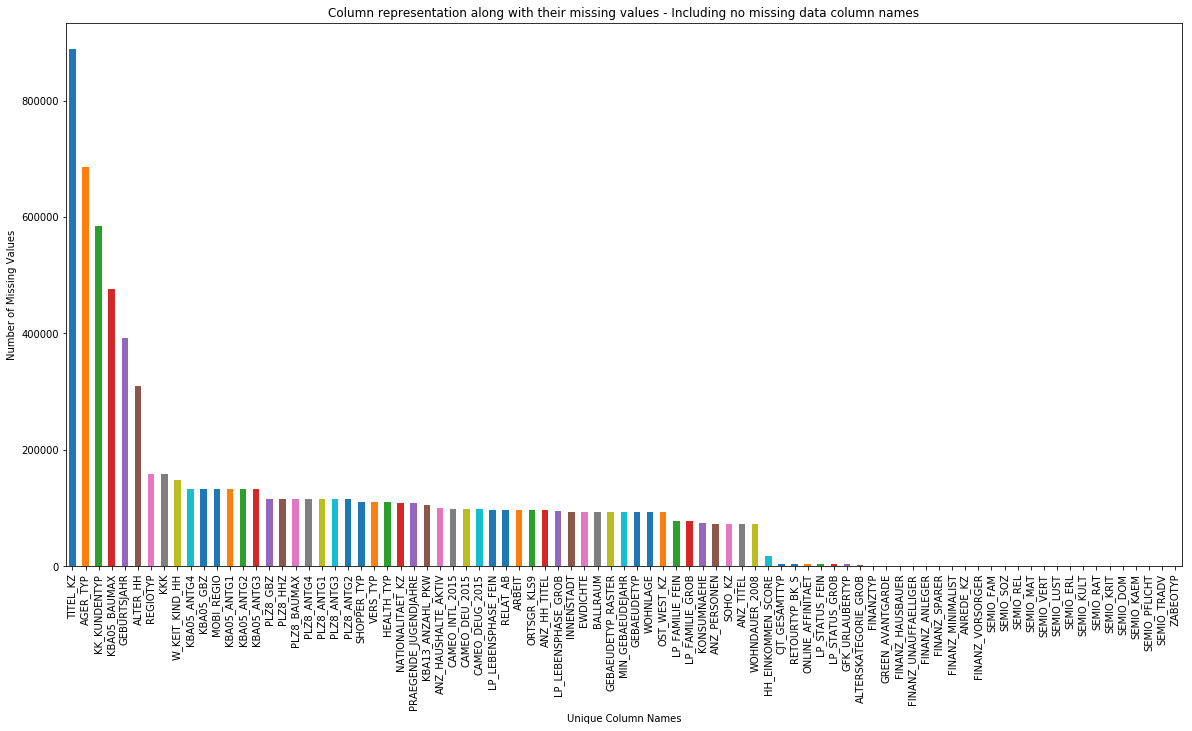

In [24]:
print("Number of missing column values results are")
missing_col_data.sort_values(ascending=False).plot.bar(figsize=(20, 10))
plt.xlabel("Unique Column Names")
plt.ylabel("Number of Missing Values")
plt.title("Column representation along with their missing values - Including no missing data column names")

excluding no missing data - i.e group by > 0


Text(0.5,1,'Column representation along with their missing values - Excluding no missing data column names')

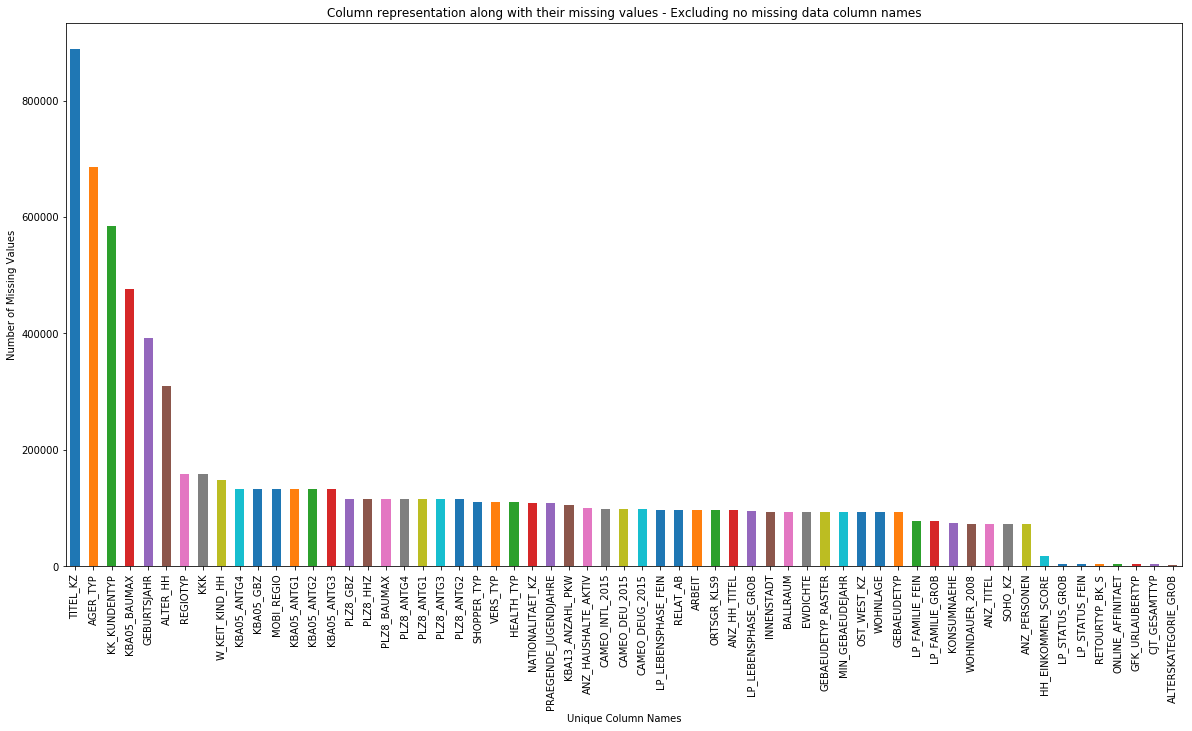

In [25]:
print("excluding no missing data - i.e group by > 0")
missing_col_data[missing_col_data > 0].sort_values(ascending=False).plot.bar(figsize=(20, 10))
plt.xlabel("Unique Column Names")
plt.ylabel("Number of Missing Values")
plt.title("Column representation along with their missing values - Excluding no missing data column names")

In [26]:
missing_column_values_percentage=missing_col_data.sort_values(ascending=False)/float(len(azdias))*100
missing_column_values_percentage.describe

<bound method NDFrame.describe of TITEL_KZ                 99.757636
AGER_TYP                 76.955435
KK_KUNDENTYP             65.596749
KBA05_BAUMAX             53.468668
GEBURTSJAHR              44.020282
ALTER_HH                 34.813699
REGIOTYP                 17.735668
KKK                      17.735668
W_KEIT_KIND_HH           16.605084
KBA05_ANTG4              14.959701
KBA05_GBZ                14.959701
MOBI_REGIO               14.959701
KBA05_ANTG1              14.959701
KBA05_ANTG2              14.959701
KBA05_ANTG3              14.959701
PLZ8_GBZ                 13.073637
PLZ8_HHZ                 13.073637
PLZ8_BAUMAX              13.073637
PLZ8_ANTG4               13.073637
PLZ8_ANTG1               13.073637
PLZ8_ANTG3               13.073637
PLZ8_ANTG2               13.073637
SHOPPER_TYP              12.476816
VERS_TYP                 12.476816
HEALTH_TYP               12.476816
NATIONALITAET_KZ         12.153551
PRAEGENDE_JUGENDJAHRE    12.136608
KBA13_ANZAHL_PKW     

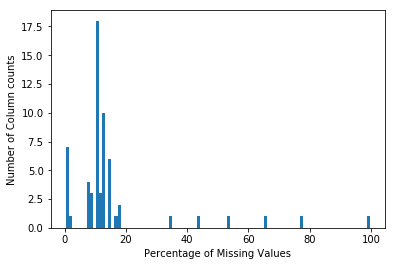

In [27]:
# Investigate patterns in the amount of missing data in each column.
missing_column_values_percentage=missing_col_data[missing_col_data > 0].sort_values(ascending=False)/float(len(azdias))*100
plt.hist(missing_column_values_percentage, bins=100)
plt.ylabel('Number of Column counts')
plt.xlabel('Percentage of Missing Values')
plt.show()


In [28]:
zero_loss_cols=missing_col_data[missing_col_data == 0]
print("zero loss columns are {}".format(zero_loss_cols.count()))
print(zero_loss_cols.index.tolist())
zero_loss_cols

zero loss columns are 24
['ANREDE_KZ', 'FINANZ_MINIMALIST', 'FINANZ_SPARER', 'FINANZ_VORSORGER', 'FINANZ_ANLEGER', 'FINANZ_UNAUFFAELLIGER', 'FINANZ_HAUSBAUER', 'FINANZTYP', 'GREEN_AVANTGARDE', 'SEMIO_SOZ', 'SEMIO_FAM', 'SEMIO_REL', 'SEMIO_MAT', 'SEMIO_VERT', 'SEMIO_LUST', 'SEMIO_ERL', 'SEMIO_KULT', 'SEMIO_RAT', 'SEMIO_KRIT', 'SEMIO_DOM', 'SEMIO_KAEM', 'SEMIO_PFLICHT', 'SEMIO_TRADV', 'ZABEOTYP']


ANREDE_KZ                0
FINANZ_MINIMALIST        0
FINANZ_SPARER            0
FINANZ_VORSORGER         0
FINANZ_ANLEGER           0
FINANZ_UNAUFFAELLIGER    0
FINANZ_HAUSBAUER         0
FINANZTYP                0
GREEN_AVANTGARDE         0
SEMIO_SOZ                0
SEMIO_FAM                0
SEMIO_REL                0
SEMIO_MAT                0
SEMIO_VERT               0
SEMIO_LUST               0
SEMIO_ERL                0
SEMIO_KULT               0
SEMIO_RAT                0
SEMIO_KRIT               0
SEMIO_DOM                0
SEMIO_KAEM               0
SEMIO_PFLICHT            0
SEMIO_TRADV              0
ZABEOTYP                 0
dtype: int64

In [29]:
# Remove the outlier columns from the dataset. (You'll perform other data
# engineering tasks such as re-encoding and imputation later.)
percent_missing_per_column_20 = missing_column_values_percentage[missing_column_values_percentage > 20]

In [30]:
drop_high_percentage_columns = percent_missing_per_column_20.index.tolist()
print('These columns with more than 20 percentage of missing data with more percentage. With so many missing values,not much of useful and no benefit for any operartion. So dropping below columns:\n {}'.format(drop_high_percentage_columns))

These columns with more than 20 percentage of missing data with more percentage. With so many missing values,not much of useful and no benefit for any operartion. So dropping below columns:
 ['TITEL_KZ', 'AGER_TYP', 'KK_KUNDENTYP', 'KBA05_BAUMAX', 'GEBURTSJAHR', 'ALTER_HH']


In [31]:
for each_delete_col in drop_high_percentage_columns:
    print(each_delete_col)

TITEL_KZ
AGER_TYP
KK_KUNDENTYP
KBA05_BAUMAX
GEBURTSJAHR
ALTER_HH


In [32]:
azdias.shape

(891221, 85)

In [33]:
azdias = azdias.drop(drop_high_percentage_columns, axis=1)

In [34]:
azdias.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
ALTERSKATEGORIE_GROB,2,1,3,4,3,1,2,1,3,3,3,2,3,1,3,4,1,2,2,3
ANREDE_KZ,1,2,2,2,1,2,2,1,1,2,2,1,1,2,1,2,2,1,2,1
CJT_GESAMTTYP,2,5,3,2,5,2,5,3,3,4,1,6,6,5,6,4,1,6,6,3
FINANZ_MINIMALIST,3,1,1,4,4,3,1,3,4,2,2,3,5,1,3,4,4,3,2,5
FINANZ_SPARER,4,5,4,2,3,1,5,3,4,4,2,4,3,4,4,1,3,4,4,2
FINANZ_VORSORGER,3,2,1,5,4,5,1,4,2,2,5,3,4,3,3,5,1,3,1,3
FINANZ_ANLEGER,5,5,2,2,1,2,5,1,4,3,3,5,2,5,5,1,4,5,5,1
FINANZ_UNAUFFAELLIGER,5,4,3,1,3,2,4,3,2,5,1,5,4,5,5,1,5,5,4,3
FINANZ_HAUSBAUER,3,5,5,2,2,5,3,2,2,4,5,3,1,2,3,4,1,3,1,1
FINANZTYP,4,1,1,6,5,2,4,5,6,1,6,4,3,1,4,2,3,4,1,5


In [35]:
azdias.shape

(891221, 79)

#### Discussion 1.1.2: Assess Missing Data in Each Column

**Observations:**

- Highest loss column is : Title_KZ with 889061
- Number of 0 loss columns are : 24
- zero loss column names are : 'ANREDE_KZ', 'FINANZ_MINIMALIST', 'FINANZ_SPARER', 'FINANZ_VORSORGER', 'FINANZ_ANLEGER', 'FINANZ_UNAUFFAELLIGER', 'FINANZ_HAUSBAUER', 'FINANZTYP', 'GREEN_AVANTGARDE', 'SEMIO_SOZ', 'SEMIO_FAM', 'SEMIO_REL', 'SEMIO_MAT', 'SEMIO_VERT', 'SEMIO_LUST', 'SEMIO_ERL', 'SEMIO_KULT', 'SEMIO_RAT', 'SEMIO_KRIT', 'SEMIO_DOM', 'SEMIO_KAEM', 'SEMIO_PFLICHT', 'SEMIO_TRADV', 'ZABEOTYP'
- High percentage missing column values are : 'TITEL_KZ', 'AGER_TYP', 'KK_KUNDENTYP', 'KBA05_BAUMAX', 'GEBURTSJAHR', 'ALTER_HH' (more than 30%)
- Total columns now present in Azdias dataset are : 80 (5 are removed due to high NaN values)

#### Step 1.1.3: Assess Missing Data in Each Row

Now, you'll perform a similar assessment for the rows of the dataset. How much data is missing in each row? As with the columns, you should see some groups of points that have a very different numbers of missing values. Divide the data into two subsets: one for data points that are above some threshold for missing values, and a second subset for points below that threshold.

In order to know what to do with the outlier rows, we should see if the distribution of data values on columns that are not missing data (or are missing very little data) are similar or different between the two groups. Select at least five of these columns and compare the distribution of values.
- You can use seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) function to create a bar chart of code frequencies and matplotlib's [`subplot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) function to put bar charts for the two subplots side by side.
- To reduce repeated code, you might want to write a function that can perform this comparison, taking as one of its arguments a column to be compared.

Depending on what you observe in your comparison, this will have implications on how you approach your conclusions later in the analysis. If the distributions of non-missing features look similar between the data with many missing values and the data with few or no missing values, then we could argue that simply dropping those points from the analysis won't present a major issue. On the other hand, if the data with many missing values looks very different from the data with few or no missing values, then we should make a note on those data as special. We'll revisit these data later on. **Either way, you should continue your analysis for now using just the subset of the data with few or no missing values.**

In [36]:
# How much data is missing in each row of the dataset?
missing_values_per_row =azdias.isnull().sum(axis=1)
#missing_values_per_row=missing_values_per_row[missing_values_per_row > 0] #excluding 0 missing records

#sort the missing values in descending order
missing_values_per_row_desc=missing_values_per_row.sort_values(ascending=False)

missing_values_per_row_desc

643174    49
732775    49
472919    48
183108    47
139316    47
691141    47
691142    47
691171    47
691183    47
139332    47
691197    47
139323    47
691212    47
691122    47
139267    47
139255    47
139250    47
139248    47
139245    47
139243    47
691317    47
691129    47
691118    47
139236    47
139478    47
690871    47
690876    47
690878    47
690887    47
139521    47
          ..
540246     0
540244     0
540243     0
540242     0
540241     0
540240     0
540239     0
540269     0
540271     0
540300     0
540289     0
540299     0
540298     0
540296     0
540295     0
540293     0
540292     0
540291     0
540290     0
540287     0
540273     0
540286     0
540284     0
540283     0
540281     0
540280     0
540277     0
540275     0
540274     0
445610     0
Length: 891221, dtype: int64

In [37]:
missing_values_per_row.describe()

count    891221.000000
mean          5.649894
std          13.234687
min           0.000000
25%           0.000000
50%           0.000000
75%           3.000000
max          49.000000
dtype: float64

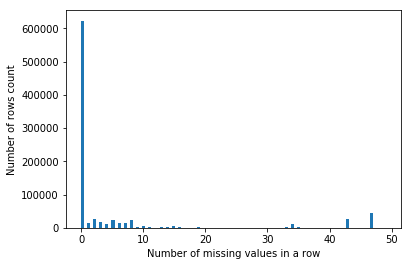

In [38]:
plt.hist(missing_values_per_row, bins=100)
plt.ylabel('Number of rows count')
plt.xlabel('Number of missing values in a row')
plt.show()

In [39]:
missing_values_per_row.describe()

count    891221.000000
mean          5.649894
std          13.234687
min           0.000000
25%           0.000000
50%           0.000000
75%           3.000000
max          49.000000
dtype: float64

In [40]:
missing_row_values_percentage=(missing_values_per_row.sort_values()/azdias.shape[1])*100
missing_row_values_percentage.sort_values(ascending=False)

643174    62.025316
732775    62.025316
472919    60.759494
397806    59.493671
344502    59.493671
397698    59.493671
397729    59.493671
397733    59.493671
397770    59.493671
344437    59.493671
397781    59.493671
397784    59.493671
344416    59.493671
397401    59.493671
344632    59.493671
344733    59.493671
398247    59.493671
344734    59.493671
344864    59.493671
397199    59.493671
397202    59.493671
344857    59.493671
397206    59.493671
344578    59.493671
344644    59.493671
344842    59.493671
423507    59.493671
423472    59.493671
423473    59.493671
423479    59.493671
            ...    
268839     0.000000
67616      0.000000
133840     0.000000
268841     0.000000
133839     0.000000
67615      0.000000
133838     0.000000
133837     0.000000
36307      0.000000
268845     0.000000
8890       0.000000
133842     0.000000
67608      0.000000
268834     0.000000
49391      0.000000
133824     0.000000
8886       0.000000
268865     0.000000
133823     0.000000


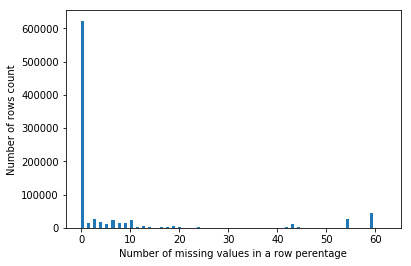

In [41]:
#number of missing values in a row percentage
plt.hist(missing_row_values_percentage,bins=100)
plt.ylabel('Number of rows count')
plt.xlabel('Number of missing values in a row perentage')
plt.show()

In [42]:
# Write code to divide the data into two subsets based on the number of missing
# values in each row.
#part-1
missing_row_values_threshold=30
high_values_missing_in_row=azdias[missing_values_per_row >= missing_row_values_threshold]
print("Number of recs with high values missing in a row are {} out of {}".format(high_values_missing_in_row.shape[0],missing_values_per_row.shape[0]))

Number of recs with high values missing in a row are 93160 out of 891221


In [43]:
#part-2
low_values_missing_in_row=azdias[missing_values_per_row < missing_row_values_threshold]
print("Number of recs with low values missing in a row are {} out of {}".format(low_values_missing_in_row.shape[0],missing_values_per_row.shape[0]))

Number of recs with low values missing in a row are 798061 out of 891221


In [44]:
high_values_missing_in_row.index,low_values_missing_in_row.index

(Int64Index([     0,     11,     14,     17,     24,     30,     35,     46,
                 48,     53,
             ...
             891100, 891130, 891137, 891140, 891159, 891164, 891171, 891175,
             891185, 891187],
            dtype='int64', length=93160),
 Int64Index([     1,      2,      3,      4,      5,      6,      7,      8,
                  9,     10,
             ...
             891211, 891212, 891213, 891214, 891215, 891216, 891217, 891218,
             891219, 891220],
            dtype='int64', length=798061))

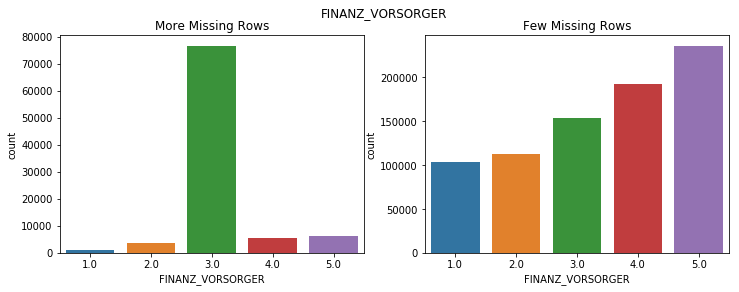

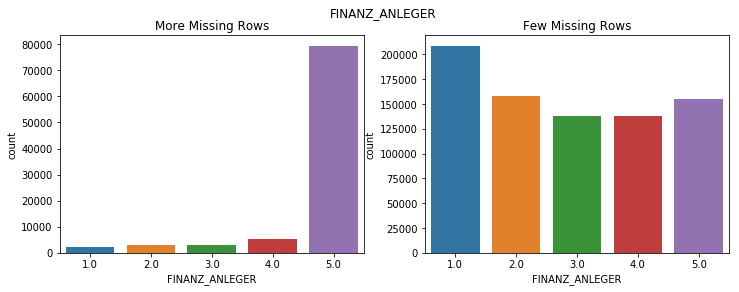

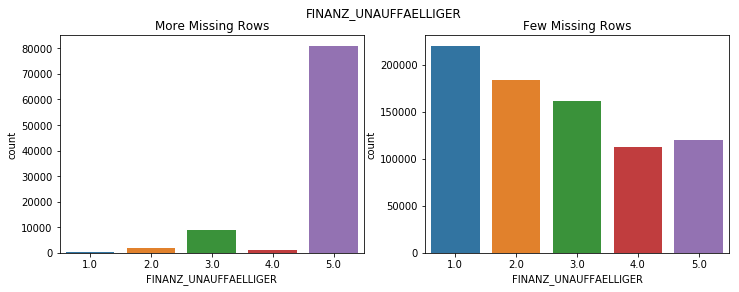

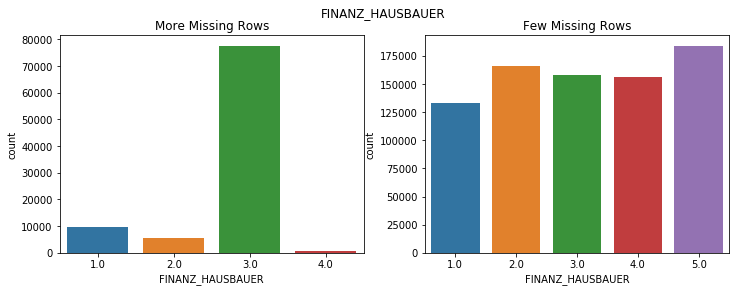

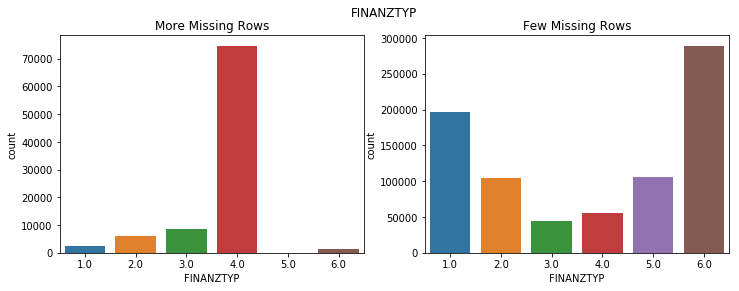

In [45]:
def compare_plot(column_name):
    fig = plt.figure(10, figsize=(12,4))
    
    ax1 = fig.add_subplot(121)
    ax1.title.set_text('More Missing Rows')
    sns.countplot(high_values_missing_in_row[column_name])
    
    ax2 = fig.add_subplot(122)
    ax2.title.set_text('Few Missing Rows')
    sns.countplot(low_values_missing_in_row[column_name])
                                                       
    fig.suptitle(column_name)
    plt.show()

zero_loss=['FINANZ_VORSORGER', 'FINANZ_ANLEGER', 'FINANZ_UNAUFFAELLIGER', 'FINANZ_HAUSBAUER', 'FINANZTYP']
for i in zero_loss:
    compare_plot(i)

In [46]:
type(low_values_missing_in_row)

pandas.core.frame.DataFrame

In [47]:
low_values_missing_in_row_bkp=low_values_missing_in_row

In [48]:
#low_values_missing_in_row=low_values_missing_in_row_bkp

In [49]:
low_values_missing_in_row = low_values_missing_in_row.fillna(low_values_missing_in_row.mode().iloc[0])

In [50]:
type(low_values_missing_in_row)

pandas.core.frame.DataFrame

In [51]:
low_values_missing_in_row.shape

(798061, 79)

#### Discussion 1.1.3: Assess Missing Data in Each Row

After considerful observation, from the above plot graphs - I can say that data with high missing values records are totally different with low missing value records. dropping any column would create a confusion as both graph variations are totally differnt. data threshold point consider is 25 %

### Step 1.2: Select and Re-Encode Features

Checking for missing data isn't the only way in which you can prepare a dataset for analysis. Since the unsupervised learning techniques to be used will only work on data that is encoded numerically, you need to make a few encoding changes or additional assumptions to be able to make progress. In addition, while almost all of the values in the dataset are encoded using numbers, not all of them represent numeric values. Check the third column of the feature summary (`feat_info`) for a summary of types of measurement.
- For numeric and interval data, these features can be kept without changes.
- Most of the variables in the dataset are ordinal in nature. While ordinal values may technically be non-linear in spacing, make the simplifying assumption that the ordinal variables can be treated as being interval in nature (that is, kept without any changes).
- Special handling may be necessary for the remaining two variable types: categorical, and 'mixed'.

In the first two parts of this sub-step, you will perform an investigation of the categorical and mixed-type features and make a decision on each of them, whether you will keep, drop, or re-encode each. Then, in the last part, you will create a new data frame with only the selected and engineered columns.

Data wrangling is often the trickiest part of the data analysis process, and there's a lot of it to be done here. But stick with it: once you're done with this step, you'll be ready to get to the machine learning parts of the project!

In [52]:
feat_info_bkp=feat_info

In [53]:
feat_info_bkp.describe

<bound method NDFrame.describe of                 attribute information_level         type missing_or_unknown
0                AGER_TYP            person  categorical             [-1,0]
1    ALTERSKATEGORIE_GROB            person      ordinal           [-1,0,9]
2               ANREDE_KZ            person  categorical             [-1,0]
3           CJT_GESAMTTYP            person  categorical                [0]
4       FINANZ_MINIMALIST            person      ordinal               [-1]
5           FINANZ_SPARER            person      ordinal               [-1]
6        FINANZ_VORSORGER            person      ordinal               [-1]
7          FINANZ_ANLEGER            person      ordinal               [-1]
8   FINANZ_UNAUFFAELLIGER            person      ordinal               [-1]
9        FINANZ_HAUSBAUER            person      ordinal               [-1]
10              FINANZTYP            person  categorical               [-1]
11            GEBURTSJAHR            person      numer

In [54]:
feat_info = feat_info[feat_info.attribute.isin(list(azdias.columns.values))]
feat_info['type'].value_counts()

ordinal        49
categorical    18
mixed           6
numeric         6
Name: type, dtype: int64

In [55]:
feat_info.describe

<bound method NDFrame.describe of                 attribute information_level         type missing_or_unknown
1    ALTERSKATEGORIE_GROB            person      ordinal           [-1,0,9]
2               ANREDE_KZ            person  categorical             [-1,0]
3           CJT_GESAMTTYP            person  categorical                [0]
4       FINANZ_MINIMALIST            person      ordinal               [-1]
5           FINANZ_SPARER            person      ordinal               [-1]
6        FINANZ_VORSORGER            person      ordinal               [-1]
7          FINANZ_ANLEGER            person      ordinal               [-1]
8   FINANZ_UNAUFFAELLIGER            person      ordinal               [-1]
9        FINANZ_HAUSBAUER            person      ordinal               [-1]
10              FINANZTYP            person  categorical               [-1]
12        GFK_URLAUBERTYP            person  categorical                 []
13       GREEN_AVANTGARDE            person  categoric

#### Step 1.2.1: Re-Encode Categorical Features

For categorical data, you would ordinarily need to encode the levels as dummy variables. Depending on the number of categories, perform one of the following:
- For binary (two-level) categoricals that take numeric values, you can keep them without needing to do anything.
- There is one binary variable that takes on non-numeric values. For this one, you need to re-encode the values as numbers or create a dummy variable.
- For multi-level categoricals (three or more values), you can choose to encode the values using multiple dummy variables (e.g. via [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)), or (to keep things straightforward) just drop them from the analysis. As always, document your choices in the Discussion section.

In [56]:
feat_cols = feat_info.loc[feat_info_orig["type"] == "categorical","attribute"].values
feat_cols
feat_columns=[]
for each_feat_cat_col in feat_cols:
    if each_feat_cat_col in azdias.columns:
        feat_columns.append(each_feat_cat_col)

print("feature cateforical columns length : {}".format(len(feat_columns)))
feat_columns

feature cateforical columns length : 18


['ANREDE_KZ',
 'CJT_GESAMTTYP',
 'FINANZTYP',
 'GFK_URLAUBERTYP',
 'GREEN_AVANTGARDE',
 'LP_FAMILIE_FEIN',
 'LP_FAMILIE_GROB',
 'LP_STATUS_FEIN',
 'LP_STATUS_GROB',
 'NATIONALITAET_KZ',
 'SHOPPER_TYP',
 'SOHO_KZ',
 'VERS_TYP',
 'ZABEOTYP',
 'GEBAEUDETYP',
 'OST_WEST_KZ',
 'CAMEO_DEUG_2015',
 'CAMEO_DEU_2015']

In [57]:
azdias[feat_columns].nunique()

ANREDE_KZ            2
CJT_GESAMTTYP        6
FINANZTYP            6
GFK_URLAUBERTYP     12
GREEN_AVANTGARDE     2
LP_FAMILIE_FEIN     11
LP_FAMILIE_GROB      5
LP_STATUS_FEIN      10
LP_STATUS_GROB       5
NATIONALITAET_KZ     3
SHOPPER_TYP          4
SOHO_KZ              2
VERS_TYP             2
ZABEOTYP             6
GEBAEUDETYP          7
OST_WEST_KZ          2
CAMEO_DEUG_2015      9
CAMEO_DEU_2015      44
dtype: int64

In [58]:
type(azdias.columns)
azdias.columns
if "HH_EINKOMMEN_SCORE" in azdias.columns:
    print("true")

true


In [59]:
binary_cols=[]
multi_level_cols=[]
for column in feat_columns:
    if low_values_missing_in_row[column].nunique() > 2:
        multi_level_cols.append(column)
    else:
        binary_cols.append(column)
        
print("\nBinary columns are \n\n{}".format(str(binary_cols)))
print("\nMulti Level columns are \n\n{}".format(str(multi_level_cols)))


Binary columns are 

['ANREDE_KZ', 'GREEN_AVANTGARDE', 'SOHO_KZ', 'VERS_TYP', 'OST_WEST_KZ']

Multi Level columns are 

['CJT_GESAMTTYP', 'FINANZTYP', 'GFK_URLAUBERTYP', 'LP_FAMILIE_FEIN', 'LP_FAMILIE_GROB', 'LP_STATUS_FEIN', 'LP_STATUS_GROB', 'NATIONALITAET_KZ', 'SHOPPER_TYP', 'ZABEOTYP', 'GEBAEUDETYP', 'CAMEO_DEUG_2015', 'CAMEO_DEU_2015']


In [60]:
#print each binary unique values
for col in binary_cols:
    print(low_values_missing_in_row[col].value_counts())

2.0    416177
1.0    381884
Name: ANREDE_KZ, dtype: int64
0    622836
1    175225
Name: GREEN_AVANTGARDE, dtype: int64
0.0    791344
1.0      6717
Name: SOHO_KZ, dtype: int64
2.0    430959
1.0    367102
Name: VERS_TYP, dtype: int64
W    629520
O    168541
Name: OST_WEST_KZ, dtype: int64


In [61]:
low_values_missing_in_row.shape

(798061, 79)

In [62]:
for feature in binary_cols:
    print('Unique values for {} are {}'.format(feature, low_values_missing_in_row[feature].unique()))

Unique values for ANREDE_KZ are [ 2.  1.]
Unique values for GREEN_AVANTGARDE are [0 1]
Unique values for SOHO_KZ are [ 1.  0.]
Unique values for VERS_TYP are [ 2.  1.]
Unique values for OST_WEST_KZ are ['W' 'O']


In [63]:
# Encode to 1,0 for binary cols
low_values_missing_in_row['ANREDE_KZ'].replace([2,1], [1,0], inplace=True)
low_values_missing_in_row['SOHO_KZ'].replace([1.0,0.0], [1,0], inplace=True)
low_values_missing_in_row['VERS_TYP'].replace([2.0,1.0], [1,0], inplace=True)
#low_values_missing_in_row['OST_WEST_KZ'].replace(['W','O'], [1,0], inplace=True)

In [64]:
#to change values to numerical with dummies
multi_level_cols.append('OST_WEST_KZ')

In [65]:
# Re-encode categorical variable(s) to be kept in the analysis.
low_values_missing_in_row = pd.get_dummies(low_values_missing_in_row, columns=multi_level_cols)

In [66]:
low_values_missing_in_row.shape

(798061, 195)

In [67]:
# After Encoding
for col in binary_cols:
    if col != "OST_WEST_KZ":
        print(low_values_missing_in_row[col].value_counts())

1.0    416177
0.0    381884
Name: ANREDE_KZ, dtype: int64
0    622836
1    175225
Name: GREEN_AVANTGARDE, dtype: int64
0.0    791344
1.0      6717
Name: SOHO_KZ, dtype: int64
1.0    430959
0.0    367102
Name: VERS_TYP, dtype: int64


In [68]:
for feature in binary_cols:
    if feature != "OST_WEST_KZ":
        print('Unique values for {} are {}'.format(feature, low_values_missing_in_row[feature].unique()))

Unique values for ANREDE_KZ are [ 1.  0.]
Unique values for GREEN_AVANTGARDE are [0 1]
Unique values for SOHO_KZ are [ 1.  0.]
Unique values for VERS_TYP are [ 1.  0.]


#### Discussion 1.2.1: Re-Encode Categorical Features

steps:

1. Re-encoded the values in 'OST_WEST_KZ' as numbers to keep it in analysis.
2. Kept all binary features, namely 'ANREDE_KZ', 'GREEN_AVANTGARDE', 'SOHO_KZ', 'VERS_TYP', 'OST_WEST_KZ'
3. used pd.get_dummies() to encode all multi-level features

#### Step 1.2.2: Engineer Mixed-Type Features

There are a handful of features that are marked as "mixed" in the feature summary that require special treatment in order to be included in the analysis. There are two in particular that deserve attention; the handling of the rest are up to your own choices:
- "PRAEGENDE_JUGENDJAHRE" combines information on three dimensions: generation by decade, movement (mainstream vs. avantgarde), and nation (east vs. west). While there aren't enough levels to disentangle east from west, you should create two new variables to capture the other two dimensions: an interval-type variable for decade, and a binary variable for movement.
- "CAMEO_INTL_2015" combines information on two axes: wealth and life stage. Break up the two-digit codes by their 'tens'-place and 'ones'-place digits into two new ordinal variables (which, for the purposes of this project, is equivalent to just treating them as their raw numeric values).
- If you decide to keep or engineer new features around the other mixed-type features, make sure you note your steps in the Discussion section.

Be sure to check `Data_Dictionary.md` for the details needed to finish these tasks.

In [69]:
# Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.
low_values_missing_in_row['PRAEGENDE_JUGENDJAHRE'].head()

1    14.0
2    15.0
3     8.0
4     8.0
5     3.0
Name: PRAEGENDE_JUGENDJAHRE, dtype: float64

In [70]:
low_values_missing_in_row.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,CAMEO_DEU_2015_8B,CAMEO_DEU_2015_8C,CAMEO_DEU_2015_8D,CAMEO_DEU_2015_9A,CAMEO_DEU_2015_9B,CAMEO_DEU_2015_9C,CAMEO_DEU_2015_9D,CAMEO_DEU_2015_9E,OST_WEST_KZ_O,OST_WEST_KZ_W
1,1.0,1.0,1.0,5.0,2.0,5.0,4.0,5.0,0,3.0,...,0,0,0,0,0,0,0,0,0,1
2,3.0,1.0,1.0,4.0,1.0,2.0,3.0,5.0,1,3.0,...,0,0,0,0,0,0,0,0,0,1
3,4.0,1.0,4.0,2.0,5.0,2.0,1.0,2.0,0,2.0,...,0,0,0,0,0,0,0,0,0,1
4,3.0,0.0,4.0,3.0,4.0,1.0,3.0,2.0,0,3.0,...,0,0,0,0,0,0,0,0,0,1
5,1.0,1.0,3.0,1.0,5.0,2.0,2.0,5.0,0,3.0,...,0,1,0,0,0,0,0,0,0,1


In [71]:
#defining two new variables

def interval_decade(x):
    if x in (1,2):
        return 1
    elif x in (3,4):
        return 2
    elif x in (5,6,7):
        return 3
    elif x in (8,9):
        return 4
    else:
        return 5
    
def movement(x):
    if x % 2 == 0:
        return 0
    else:
        return 1

In [72]:
# adding new columns "decade"  and 'movement'
low_values_missing_in_row['PRAEGENDE_JUGENDJAHRE_DECADES'] = low_values_missing_in_row['PRAEGENDE_JUGENDJAHRE'].apply(interval_decade)
low_values_missing_in_row['PRAEGENDE_JUGENDJAHRE_MOVEMENTS'] = low_values_missing_in_row['PRAEGENDE_JUGENDJAHRE'].apply(movement)

In [73]:
low_values_missing_in_row['PRAEGENDE_JUGENDJAHRE_DECADES'].value_counts().sort_index()

1     28157
2     74296
3    114353
4    175200
5    406055
Name: PRAEGENDE_JUGENDJAHRE_DECADES, dtype: int64

In [74]:
#define wlath and life features
#"CAMEO_INTL_2015" combines information on two axes: wealth and life stage. 
#Break up the two-digit codes by their 'tens'-place and 'ones'-place digits into two new ordinal variables (which, for the purposes of this project, is equivalent to just treating them as their raw numeric values).

def cameo_intl_wealth(x):
    try:
        return int(x) // 10
    except ValueError:
        return np.nan

def cameo_intl_life_stage(x):
    try:
        return int(x) % 10
    except ValueError:
        return np.nan   

In [75]:
low_values_missing_in_row['CAMEO_INTL_2015'].value_counts()

51    139892
41     92336
24     91157
14     62884
43     56672
54     45391
25     39626
22     33154
23     26750
13     26335
45     26132
55     23955
52     20542
31     19023
34     18524
15     16974
44     14820
12     13249
35     10356
32     10354
33      9935
Name: CAMEO_INTL_2015, dtype: int64

In [76]:
# Investigate "CAMEO_INTL_2015" and engineer two new variables.
low_values_missing_in_row['CAMEO_INTL_2015_WEALTH'] = low_values_missing_in_row['CAMEO_INTL_2015'].apply(cameo_intl_wealth)
low_values_missing_in_row['CAMEO_INTL_2015_LIFE_STAGE'] = low_values_missing_in_row['CAMEO_INTL_2015'].apply(cameo_intl_life_stage)

In [77]:
low_values_missing_in_row['CAMEO_INTL_2015_WEALTH'].value_counts()

5    229780
2    190687
4    189960
1    119442
3     68192
Name: CAMEO_INTL_2015_WEALTH, dtype: int64

In [78]:
low_values_missing_in_row['CAMEO_INTL_2015_LIFE_STAGE'].value_counts()

1    251251
4    232776
3    119692
5    117043
2     77299
Name: CAMEO_INTL_2015_LIFE_STAGE, dtype: int64

In [79]:
low_values_missing_in_row.isnull().sum().sum()

0

In [80]:
low_values_missing_in_row.drop('PRAEGENDE_JUGENDJAHRE', axis = 1, inplace = True)
low_values_missing_in_row.drop('CAMEO_INTL_2015', axis = 1, inplace = True)

In [81]:
low_values_missing_in_row.shape

(798061, 197)

#### Discussion 1.2.2: Engineer Mixed-Type Features

dropped features PRAEGENDE_JUGENDJAHRE and CAMEO_INTL_2015.

the steps which I used:

1. created two functions to map and replace with int number for PRAEGENDE_JUGENDJAHRE
2. created two functions to map and replace with int number for CAMEO_INTL_2015
4. dropped original source columns

#### Step 1.2.3: Complete Feature Selection

In order to finish this step up, you need to make sure that your data frame now only has the columns that you want to keep. To summarize, the dataframe should consist of the following:
- All numeric, interval, and ordinal type columns from the original dataset.
- Binary categorical features (all numerically-encoded).
- Engineered features from other multi-level categorical features and mixed features.

Make sure that for any new columns that you have engineered, that you've excluded the original columns from the final dataset. Otherwise, their values will interfere with the analysis later on the project. For example, you should not keep "PRAEGENDE_JUGENDJAHRE", since its values won't be useful for the algorithm: only the values derived from it in the engineered features you created should be retained. As a reminder, your data should only be from **the subset with few or no missing values**.

In [82]:
# Do whatever you need to in order to ensure that the dataframe only contains
# the columns that should be passed to the algorithm functions.
np.unique(low_values_missing_in_row.dtypes.values)

array([dtype('uint8'), dtype('int64'), dtype('float64')], dtype=object)

In [83]:
low_values_missing_in_row.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,CAMEO_DEU_2015_9B,CAMEO_DEU_2015_9C,CAMEO_DEU_2015_9D,CAMEO_DEU_2015_9E,OST_WEST_KZ_O,OST_WEST_KZ_W,PRAEGENDE_JUGENDJAHRE_DECADES,PRAEGENDE_JUGENDJAHRE_MOVEMENTS,CAMEO_INTL_2015_WEALTH,CAMEO_INTL_2015_LIFE_STAGE
1,1.0,1.0,1.0,5.0,2.0,5.0,4.0,5.0,0,3.0,...,0,0,0,0,0,1,5,0,5,1
2,3.0,1.0,1.0,4.0,1.0,2.0,3.0,5.0,1,3.0,...,0,0,0,0,0,1,5,1,2,4
3,4.0,1.0,4.0,2.0,5.0,2.0,1.0,2.0,0,2.0,...,0,0,0,0,0,1,4,0,1,2
4,3.0,0.0,4.0,3.0,4.0,1.0,3.0,2.0,0,3.0,...,0,0,0,0,0,1,4,0,4,3
5,1.0,1.0,3.0,1.0,5.0,2.0,2.0,5.0,0,3.0,...,0,0,0,0,0,1,2,1,5,4


In [84]:
low_values_missing_in_row.isnull().sum().sum()

0

### Step 1.3: Create a Cleaning Function

Even though you've finished cleaning up the general population demographics data, it's important to look ahead to the future and realize that you'll need to perform the same cleaning steps on the customer demographics data. In this substep, complete the function below to execute the main feature selection, encoding, and re-engineering steps you performed above. Then, when it comes to looking at the customer data in Step 3, you can just run this function on that DataFrame to get the trimmed dataset in a single step.

In [85]:
def clean_data(df):
    #read feature file
    feature_summary_info=pd.read_csv('AZDIAS_Feature_Summary.csv',delimiter=';')
    feat_attr_cols=feature_summary_info['attribute'].values
    missing_values=list()
    for values in feat_info["missing_or_unknown"]:
        missing_values.append(values[1:-1].split(","))
    for attribute,missing_values_list in zip(feat_info["attribute"],missing_values):
        if missing_values_list[0] != "": 
            for missing_value in missing_values_list:
                if missing_value.isnumeric() or missing_value.lstrip('-').isnumeric():
                    missing_value = int(missing_value)
                df.loc[df[attribute] == missing_value, attribute] = np.nan
    null_values_per_feature =(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)*100
            
    df = df.drop(drop_high_percentage_columns,axis=1)
    
    missing_value_rows = df.isnull()
    total_missing_rows = missing_value_rows.sum(axis=1)
    
    high_missing_null_values_above30 = df[df.isnull().sum(axis=1) >= 30]
    low_missing_null_values_above30 = df[df.isnull().sum(axis=1) < 30]

    print('Rows with data missing above 30 :', high_missing_null_values_above30.shape[0], 'or', \
      np.round(high_missing_null_values_above30.shape[0]*100/df.shape[0],2), '% of all data')
    
    low_missing_null_values_above30 = low_missing_null_values_above30.fillna(low_missing_null_values_above30.mode().iloc[0])
    categorical_varibale = feat_info[feat_info.type=='categorical']
    multi_level=multi_level_cols
    low_missing_null_values_above30 = pd.get_dummies(low_missing_null_values_above30, columns=multi_level)
    
    low_missing_null_values_above30['PRAEGENDE_JUGENDJAHRE_DECADES'] = low_missing_null_values_above30['PRAEGENDE_JUGENDJAHRE'].apply(interval_decade)
    low_missing_null_values_above30['PRAEGENDE_JUGENDJAHRE_MOVEMENTS'] = low_missing_null_values_above30['PRAEGENDE_JUGENDJAHRE'].apply(movement)
    low_missing_null_values_above30.drop('PRAEGENDE_JUGENDJAHRE', axis=1, inplace=True)
    
    low_missing_null_values_above30['CAMEO_INTL_2015_WEALTH'] = low_missing_null_values_above30['CAMEO_INTL_2015'].apply(cameo_intl_wealth)
    low_missing_null_values_above30['CAMEO_INTL_2015_LIFE_STAGE'] = low_missing_null_values_above30['CAMEO_INTL_2015'].apply(cameo_intl_life_stage)
    low_missing_null_values_above30.drop('CAMEO_INTL_2015', axis=1, inplace=True)
    # Return the cleaned dataframe.
    
    return low_missing_null_values_above30

In [86]:
azdias_test=clean_data(azdias_orig)

Rows with data missing above 30 : 93160 or 10.45 % of all data


In [87]:
low_values_missing_in_row.shape

(798061, 197)

In [88]:
azdias_test.shape

(798061, 197)

In [89]:
low_values_missing_in_row.equals(low_values_missing_in_row_bkp)

False

In [90]:
azdias_test.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,CAMEO_DEU_2015_9B,CAMEO_DEU_2015_9C,CAMEO_DEU_2015_9D,CAMEO_DEU_2015_9E,OST_WEST_KZ_O,OST_WEST_KZ_W,PRAEGENDE_JUGENDJAHRE_DECADES,PRAEGENDE_JUGENDJAHRE_MOVEMENTS,CAMEO_INTL_2015_WEALTH,CAMEO_INTL_2015_LIFE_STAGE
1,1.0,2.0,1.0,5.0,2.0,5.0,4.0,5.0,0,3.0,...,0,0,0,0,0,1,5,0,5,1
2,3.0,2.0,1.0,4.0,1.0,2.0,3.0,5.0,1,3.0,...,0,0,0,0,0,1,5,1,2,4
3,4.0,2.0,4.0,2.0,5.0,2.0,1.0,2.0,0,2.0,...,0,0,0,0,0,1,4,0,1,2
4,3.0,1.0,4.0,3.0,4.0,1.0,3.0,2.0,0,3.0,...,0,0,0,0,0,1,4,0,4,3
5,1.0,2.0,3.0,1.0,5.0,2.0,2.0,5.0,0,3.0,...,0,0,0,0,0,1,2,1,5,4


## Step 2: Feature Transformation

### Step 2.1: Apply Feature Scaling

Before we apply dimensionality reduction techniques to the data, we need to perform feature scaling so that the principal component vectors are not influenced by the natural differences in scale for features. Starting from this part of the project, you'll want to keep an eye on the [API reference page for sklearn](http://scikit-learn.org/stable/modules/classes.html) to help you navigate to all of the classes and functions that you'll need. In this substep, you'll need to check the following:

- sklearn requires that data not have missing values in order for its estimators to work properly. So, before applying the scaler to your data, make sure that you've cleaned the DataFrame of the remaining missing values. This can be as simple as just removing all data points with missing data, or applying an [Imputer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html) to replace all missing values. You might also try a more complicated procedure where you temporarily remove missing values in order to compute the scaling parameters before re-introducing those missing values and applying imputation. Think about how much missing data you have and what possible effects each approach might have on your analysis, and justify your decision in the discussion section below.
- For the actual scaling function, a [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) instance is suggested, scaling each feature to mean 0 and standard deviation 1.
- For these classes, you can make use of the `.fit_transform()` method to both fit a procedure to the data as well as apply the transformation to the data at the same time. Don't forget to keep the fit sklearn objects handy, since you'll be applying them to the customer demographics data towards the end of the project.

In [91]:
low_values_missing_in_row.isnull().sum().sum()

0

In [92]:
low_values_missing_in_row_bkp1=low_values_missing_in_row

In [93]:
#low_values_missing_in_row=low_values_missing_in_row_bkp1

In [94]:
low_values_missing_in_row.shape

(798061, 197)

In [95]:
low_values_missing_in_row.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,CAMEO_DEU_2015_9B,CAMEO_DEU_2015_9C,CAMEO_DEU_2015_9D,CAMEO_DEU_2015_9E,OST_WEST_KZ_O,OST_WEST_KZ_W,PRAEGENDE_JUGENDJAHRE_DECADES,PRAEGENDE_JUGENDJAHRE_MOVEMENTS,CAMEO_INTL_2015_WEALTH,CAMEO_INTL_2015_LIFE_STAGE
1,1.0,1.0,1.0,5.0,2.0,5.0,4.0,5.0,0,3.0,...,0,0,0,0,0,1,5,0,5,1
2,3.0,1.0,1.0,4.0,1.0,2.0,3.0,5.0,1,3.0,...,0,0,0,0,0,1,5,1,2,4
3,4.0,1.0,4.0,2.0,5.0,2.0,1.0,2.0,0,2.0,...,0,0,0,0,0,1,4,0,1,2
4,3.0,0.0,4.0,3.0,4.0,1.0,3.0,2.0,0,3.0,...,0,0,0,0,0,1,4,0,4,3
5,1.0,1.0,3.0,1.0,5.0,2.0,2.0,5.0,0,3.0,...,0,0,0,0,0,1,2,1,5,4


In [96]:
imputer = Imputer()
low_values_missing_in_row_imp_df = pd.DataFrame(imputer.fit_transform(low_values_missing_in_row), columns = low_values_missing_in_row.columns)

In [97]:
low_values_missing_in_row_imp_df.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,CAMEO_DEU_2015_9B,CAMEO_DEU_2015_9C,CAMEO_DEU_2015_9D,CAMEO_DEU_2015_9E,OST_WEST_KZ_O,OST_WEST_KZ_W,PRAEGENDE_JUGENDJAHRE_DECADES,PRAEGENDE_JUGENDJAHRE_MOVEMENTS,CAMEO_INTL_2015_WEALTH,CAMEO_INTL_2015_LIFE_STAGE
0,1.0,1.0,1.0,5.0,2.0,5.0,4.0,5.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,5.0,0.0,5.0,1.0
1,3.0,1.0,1.0,4.0,1.0,2.0,3.0,5.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,2.0,4.0
2,4.0,1.0,4.0,2.0,5.0,2.0,1.0,2.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,1.0,2.0
3,3.0,0.0,4.0,3.0,4.0,1.0,3.0,2.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,4.0,3.0
4,1.0,1.0,3.0,1.0,5.0,2.0,2.0,5.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,5.0,4.0


In [98]:
# Apply feature scaling to the general population demographics data.
scalar = StandardScaler()
low_values_missing_in_row[list(low_values_missing_in_row_imp_df.columns)] = scalar.fit_transform(low_values_missing_in_row_imp_df[list(low_values_missing_in_row_imp_df.columns)])

In [99]:
type(low_values_missing_in_row)

pandas.core.frame.DataFrame

In [100]:
low_values_missing_in_row.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,CAMEO_DEU_2015_9B,CAMEO_DEU_2015_9C,CAMEO_DEU_2015_9D,CAMEO_DEU_2015_9E,OST_WEST_KZ_O,OST_WEST_KZ_W,PRAEGENDE_JUGENDJAHRE_DECADES,PRAEGENDE_JUGENDJAHRE_MOVEMENTS,CAMEO_INTL_2015_WEALTH,CAMEO_INTL_2015_LIFE_STAGE
1,-1.766646,0.957914,-1.494594,1.537924,-1.040692,1.465965,0.958645,1.339314,-0.530409,1.010164,...,-0.189539,-0.179782,-0.192768,-0.089764,-0.517426,0.517426,0.801408,-0.736905,1.175657,-1.248894
2,0.200522,0.957914,-1.494594,0.864563,-1.766980,-0.570998,0.244119,1.339314,1.885336,1.010164,...,-0.189539,-0.179782,-0.192768,-0.089764,-0.517426,0.517426,0.801408,1.357026,-0.869680,0.767095
3,1.184106,0.957914,0.683144,-0.482158,1.138172,-0.570998,-1.184933,-0.791205,-0.530409,-0.311816,...,-0.189539,-0.179782,-0.192768,-0.089764,-0.517426,0.517426,-0.063555,-0.736905,-1.551459,-0.576897
4,0.200522,-1.043935,0.683144,0.191203,0.411884,-1.249985,0.244119,-0.791205,-0.530409,1.010164,...,-0.189539,-0.179782,-0.192768,-0.089764,-0.517426,0.517426,-0.063555,-0.736905,0.493878,0.095099
5,-1.766646,0.957914,-0.042768,-1.155518,1.138172,-0.570998,-0.470407,1.339314,-0.530409,1.010164,...,-0.189539,-0.179782,-0.192768,-0.089764,-0.517426,0.517426,-1.793481,1.357026,1.175657,0.767095


In [101]:
low_values_missing_in_row.shape

(798061, 197)

### Discussion 2.1: Apply Feature Scaling

- I have used Imputer function to remove any NaN values with the help of the corresponding mean value.
- used the output of imputer dataframe in the sklearn StandardScaler object using scalar.fit_transform() method. we can see from the above that some of values are negative.

### Step 2.2: Perform Dimensionality Reduction

On your scaled data, you are now ready to apply dimensionality reduction techniques.

- Use sklearn's [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) class to apply principal component analysis on the data, thus finding the vectors of maximal variance in the data. To start, you should not set any parameters (so all components are computed) or set a number of components that is at least half the number of features (so there's enough features to see the general trend in variability).
- Check out the ratio of variance explained by each principal component as well as the cumulative variance explained. Try plotting the cumulative or sequential values using matplotlib's [`plot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) function. Based on what you find, select a value for the number of transformed features you'll retain for the clustering part of the project.
- Once you've made a choice for the number of components to keep, make sure you re-fit a PCA instance to perform the decided-on transformation.

In [102]:
# Apply PCA to the data.
pca = PCA()
pca_low_values_missing_in_row = pca.fit_transform(low_values_missing_in_row)

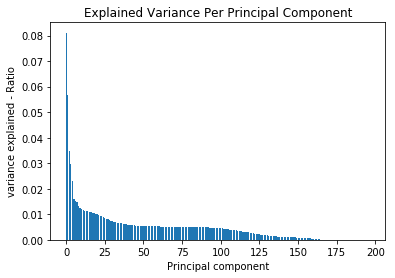

In [103]:
# Investigate the variance accounted for by each principal component.
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.title("Explained Variance Per Principal Component")
plt.xlabel("Principal component")
plt.ylabel("variance explained - Ratio")
plt.show()


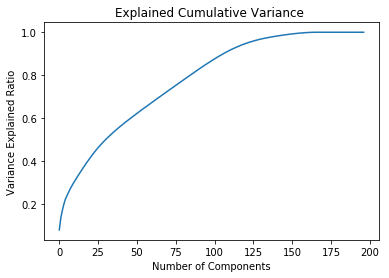

In [104]:
plt.plot(range(len(pca.explained_variance_ratio_)),np.cumsum(pca.explained_variance_ratio_), '-')
plt.title("Explained Cumulative Variance ")
plt.xlabel("Number of Components")
plt.ylabel("Variance Explained Ratio")
plt.show()

In [105]:
cum_values=np.cumsum(pca.explained_variance_ratio_)[np.arange(1,len(pca.explained_variance_ratio_),20)-1]

In [106]:
# Re-apply PCA to the data while selecting for number of components to retain.

pca = PCA(n_components=105)
pca_low_values_missing_in_row_105 = pca.fit_transform(low_values_missing_in_row)

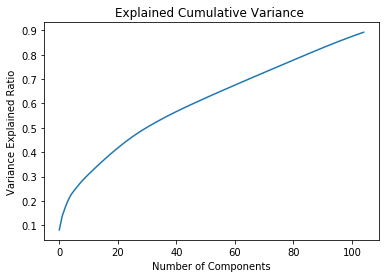

In [107]:
plt.plot(range(len(pca.explained_variance_ratio_)),np.cumsum(pca.explained_variance_ratio_), '-')
plt.title("Explained Cumulative Variance ")
plt.xlabel("Number of Components")
plt.ylabel("Variance Explained Ratio")
plt.show()

### Discussion 2.2: Perform Dimensionality Reduction

From the plot, we could see that there are about 200 components and when it reaches nearly to 105, we could see that variance for 105 components are nearly about 85% data. So I have choosed to use 105 as cluster components for variance.

### Step 2.3: Interpret Principal Components

Now that we have our transformed principal components, it's a nice idea to check out the weight of each variable on the first few components to see if they can be interpreted in some fashion.

As a reminder, each principal component is a unit vector that points in the direction of highest variance (after accounting for the variance captured by earlier principal components). The further a weight is from zero, the more the principal component is in the direction of the corresponding feature. If two features have large weights of the same sign (both positive or both negative), then increases in one tend expect to be associated with increases in the other. To contrast, features with different signs can be expected to show a negative correlation: increases in one variable should result in a decrease in the other.

- To investigate the features, you should map each weight to their corresponding feature name, then sort the features according to weight. The most interesting features for each principal component, then, will be those at the beginning and end of the sorted list. Use the data dictionary document to help you understand these most prominent features, their relationships, and what a positive or negative value on the principal component might indicate.
- You should investigate and interpret feature associations from the first three principal components in this substep. To help facilitate this, you should write a function that you can call at any time to print the sorted list of feature weights, for the *i*-th principal component. This might come in handy in the next step of the project, when you interpret the tendencies of the discovered clusters.

In [108]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.
# HINT: Try defining a function here or in a new cell that you can reuse in the
# other cells.

def pca_weight_mapping(pca, data, n):
    weight = pca.components_[n-1]
    columns_list = data.columns
    if len(weight) != len(columns_list):
        raise("both lengths are not matching, pelase validate")
    i = 0
    pca_dict = {}
    while i<len(weight):
        pca_dict[columns_list[i]] = weight[i]
        i = i+1
    return pca_dict

In [109]:
pca_weights = pca_weight_mapping(pca,low_values_missing_in_row,1)
pca_weights_in_order = sorted(pca_weights.items(), key=operator.itemgetter(1))
pca_weights_in_order

[('MOBI_REGIO', -0.18253233927157361),
 ('FINANZ_MINIMALIST', -0.18145492430215629),
 ('PLZ8_ANTG1', -0.18056114397878095),
 ('KBA05_GBZ', -0.17602738407697793),
 ('KBA05_ANTG1', -0.17478016730766754),
 ('LP_LEBENSPHASE_FEIN', -0.1449140046552149),
 ('KONSUMNAEHE', -0.1355854175985618),
 ('LP_LEBENSPHASE_GROB', -0.13227464175444129),
 ('PLZ8_GBZ', -0.1315662870349347),
 ('INNENSTADT', -0.1272665809048262),
 ('LP_STATUS_GROB_4.0', -0.11076536207182631),
 ('LP_STATUS_FEIN_9.0', -0.10958007089136579),
 ('LP_STATUS_FEIN_10.0', -0.10765691733718008),
 ('LP_STATUS_GROB_5.0', -0.10765691733718008),
 ('CAMEO_INTL_2015_LIFE_STAGE', -0.10533986406009953),
 ('GEBAEUDETYP_RASTER', -0.097104815786099766),
 ('ANZ_PERSONEN', -0.096650019967244719),
 ('BALLRAUM', -0.096428704005374691),
 ('GREEN_AVANTGARDE', -0.096052826596720112),
 ('ZABEOTYP_1.0', -0.094267987779763862),
 ('GEBAEUDETYP_1.0', -0.088018419698419267),
 ('CAMEO_DEUG_2015_2', -0.085237106264724027),
 ('LP_FAMILIE_GROB_5.0', -0.0801764649

In [110]:
# Map weights for the second principal component to corresponding feature names
# and then print the linked values, sorted by weight.
pca_weights_2 = pca_weight_mapping(pca,low_values_missing_in_row,2)
pca_weights_in_order_2 = sorted(pca_weights_2.items(), key=operator.itemgetter(1))
pca_weights_in_order_2

[('FINANZ_SPARER', -0.2314140956157375),
 ('PRAEGENDE_JUGENDJAHRE_DECADES', -0.22084562657224141),
 ('SEMIO_REL', -0.21572765252773496),
 ('FINANZ_UNAUFFAELLIGER', -0.21433374291177137),
 ('SEMIO_TRADV', -0.2090382608225046),
 ('SEMIO_PFLICHT', -0.20861953739678776),
 ('FINANZ_ANLEGER', -0.20668850953825221),
 ('SEMIO_RAT', -0.17154254297588481),
 ('SEMIO_KULT', -0.16495502551315197),
 ('ONLINE_AFFINITAET', -0.159543637022836),
 ('FINANZTYP_1.0', -0.13674620833204759),
 ('SEMIO_FAM', -0.13405136304143186),
 ('SEMIO_MAT', -0.13191178646030105),
 ('ZABEOTYP_4.0', -0.10989932127914832),
 ('LP_STATUS_FEIN_2.0', -0.097986028068235906),
 ('ZABEOTYP_5.0', -0.090267475329114971),
 ('FINANZTYP_4.0', -0.085910581473542941),
 ('LP_STATUS_FEIN_5.0', -0.077614645834443982),
 ('GFK_URLAUBERTYP_9.0', -0.073574003660696566),
 ('FINANZTYP_3.0', -0.071746004827147603),
 ('LP_FAMILIE_GROB_4.0', -0.069687025071303421),
 ('ANZ_PERSONEN', -0.06847518927960547),
 ('SEMIO_SOZ', -0.06112009168456909),
 ('HEALT

In [111]:
# Map weights for the third principal component to corresponding feature names
# and then print the linked values, sorted by weight.
pca_weights_3 = pca_weight_mapping(pca,low_values_missing_in_row,3)
#print (pca_weights)
pca_weights_in_order_3 = sorted(pca_weights_3.items(), key=operator.itemgetter(1))
pca_weights_in_order_3

[('ANREDE_KZ', -0.3455453693330009),
 ('SEMIO_KAEM', -0.31611288054934544),
 ('SEMIO_DOM', -0.28481765206105114),
 ('SEMIO_KRIT', -0.27039626293312519),
 ('SEMIO_ERL', -0.20878367171183013),
 ('SEMIO_RAT', -0.1540919500975827),
 ('FINANZ_ANLEGER', -0.15195358661025443),
 ('FINANZTYP_1.0', -0.10184171178511989),
 ('SHOPPER_TYP_2.0', -0.093006439239055896),
 ('LP_STATUS_FEIN_2.0', -0.079857556594061407),
 ('LP_STATUS_FEIN_4.0', -0.073174279475928486),
 ('FINANZ_HAUSBAUER', -0.062744325868002535),
 ('ZABEOTYP_4.0', -0.061930171004139598),
 ('FINANZ_SPARER', -0.056155190577714009),
 ('INNENSTADT', -0.054383946412496213),
 ('LP_FAMILIE_GROB_3.0', -0.053879653446961162),
 ('SHOPPER_TYP_3.0', -0.051216796239065533),
 ('PRAEGENDE_JUGENDJAHRE_DECADES', -0.050896155332854603),
 ('BALLRAUM', -0.048079131810598322),
 ('FINANZ_UNAUFFAELLIGER', -0.047015819560145798),
 ('KONSUMNAEHE', -0.04519179596375688),
 ('PLZ8_ANTG1', -0.044953072873348474),
 ('HH_EINKOMMEN_SCORE', -0.03917040103055474),
 ('ZAB

### Discussion 2.3: Interpret Principal Components - UPDATE#

From the above, we can say that

1. Used total 3 principal components, below are the observations
    *First Principle component*
    -  Highest Negative value : 
        - ('MOBI_REGIO', -0.18253233988044432) - Movement Patterns
        - ('FINANZ_MINIMALIST', -0.18145492498256724) - Financial typology
        - ('PLZ8_ANTG1', -0.18056115489333244), - Number of family houses in the PLZ8 region
        - ('KBA05_GBZ', -0.17602737233265686), - Number of buildings
        - ('KBA05_ANTG1', -0.17478016950622624), - Number of 1-2 family houses in the microcell

    -  highest postive value :
        - ('PLZ8_ANTG4', 0.17391013287220558) - Number of 10+ family houses in the PLZ8 region
        - ('CAMEO_INTL_2015_WEALTH', 0.17818999805378039)  - Wealth
        - ('HH_EINKOMMEN_SCORE', 0.17826894224737691) - Estimated household net income
        - ('PLZ8_ANTG3', 0.17944093448973125) - Number of 6-10 family houses in the PLZ8 region
        - ('LP_STATUS_GROB_1.0', 0.18884168206132873) - Social Status

 from the first principle - high relationship with large family size, wealth and social status

    *Second Principle component:*
    -  Highest negative value : 
        - ('FINANZ_SPARER', -0.23141408350472356) - Financial typology
        - ('PRAEGENDE_JUGENDJAHRE_DECADES', -0.22084556768587257) - Dominating movement of person's youth
        - ('SEMIO_REL', -0.21572769212322418) - Personality typology
        - ('FINANZ_UNAUFFAELLIGER', -0.21433371795566555) - Financial typology
        - ('SEMIO_TRADV', -0.20903826739530607) - Personality typology
    -  highest positive value :  
        - ('SEMIO_LUST', 0.16564746357352841) - Personality typology
        - ('SEMIO_ERL', 0.17929016262639774) - Personality typology
        - ('ZABEOTYP_3.0', 0.19883612785962484) - Energy consumption typology
        - ('FINANZ_VORSORGER', 0.22082198029676603) - Financial typology
        - ('ALTERSKATEGORIE_GROB', 0.23500239502559025) - Estimated age based

from the above, it seems like second component is mostly influenced by factors such as financial, youth movement and personal topology

   *Third prinicpal component:*
      -  Highest negative value : 
        - ('ANREDE_KZ', -0.34554521482634121) - Gender
        - ('SEMIO_KAEM', -0.31611284235477061) - Personality typology
        - ('SEMIO_DOM', -0.28481738910846427) - Personality typology
        - ('SEMIO_KRIT', -0.27039703562183892) - Personality typology
        - ('SEMIO_ERL', -0.20878342642847308) - Personality typology
     -  highest positive value :  
        - ('FINANZTYP_5.0', 0.13309495085431791) - descriptive financial type
        - ('SEMIO_KULT', 0.25277967592357098) - Personality typology
        - ('SEMIO_SOZ', 0.25732987026838289) - Personality typology
        - ('SEMIO_FAM', 0.26086748506091362) - Personality typology
        - ('SEMIO_VERT', 0.32004552423911703) - Personality typology
  
 from the above, personality has both significant relationship with personality.

## Step 3: Clustering

### Step 3.1: Apply Clustering to General Population

You've assessed and cleaned the demographics data, then scaled and transformed them. Now, it's time to see how the data clusters in the principal components space. In this substep, you will apply k-means clustering to the dataset and use the average within-cluster distances from each point to their assigned cluster's centroid to decide on a number of clusters to keep.

- Use sklearn's [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) class to perform k-means clustering on the PCA-transformed data.
- Then, compute the average difference from each point to its assigned cluster's center. **Hint**: The KMeans object's `.score()` method might be useful here, but note that in sklearn, scores tend to be defined so that larger is better. Try applying it to a small, toy dataset, or use an internet search to help your understanding.
- Perform the above two steps for a number of different cluster counts. You can then see how the average distance decreases with an increasing number of clusters. However, each additional cluster provides a smaller net benefit. Use this fact to select a final number of clusters in which to group the data. **Warning**: because of the large size of the dataset, it can take a long time for the algorithm to resolve. The more clusters to fit, the longer the algorithm will take. You should test for cluster counts through at least 10 clusters to get the full picture, but you shouldn't need to test for a number of clusters above about 30.
- Once you've selected a final number of clusters to use, re-fit a KMeans instance to perform the clustering operation. Make sure that you also obtain the cluster assignments for the general demographics data, since you'll be using them in the final Step 3.3.

In [112]:
#taking sample data - as comuputation time is more - 40% of data
low_values_missing_in_row_sample_pca = pca_low_values_missing_in_row_105[np.random.choice(pca_low_values_missing_in_row_105.shape[0], \
                                                    int(pca_low_values_missing_in_row_105.shape[0]*0.4), replace=False)]

In [113]:
kmeans_105 = KMeans(n_clusters=20).fit(low_values_missing_in_row_sample_pca)

In [114]:
def derive_k_score_mean(data, n_cluster):
    kmeans = KMeans(n_clusters = n_cluster)
    model = kmeans.fit(data)
    score = np.abs(model.score(data))
    return score    

In [115]:
from time import time
start_time=time()
scores = []
k_range = list(range(1,14))
for k in k_range:
    print("processing cluster {}".format(str(k)))
    scores.append(derive_k_score_mean(low_values_missing_in_row_sample_pca, k))
end_time=time()
print("total time taken to complete are {} seconds".format(end_time - start_time))

processing cluster 1
processing cluster 2
processing cluster 3
processing cluster 4
processing cluster 5
processing cluster 6
processing cluster 7
processing cluster 8
processing cluster 9
processing cluster 10
processing cluster 11
processing cluster 12
processing cluster 13
total time taken to complete are 994.1600708961487 seconds


Text(0,0.5,'SSE')

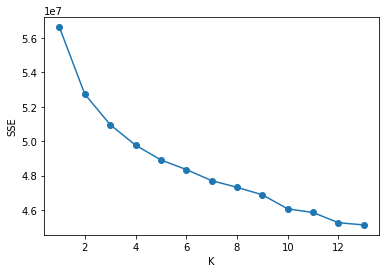

In [116]:
# Investigate the change in within-cluster distance across number of clusters.
# HINT: Use matplotlib's plot function to visualize this relationship.
plt.plot(k_range, scores, linestyle='-', marker='o')
plt.xlabel('K')
plt.ylabel('SSE')

In [117]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.
k = 13
kmeans = KMeans(k, max_iter=20, n_jobs=-1).fit(pca_low_values_missing_in_row_105)
cluster_popluation = kmeans.predict(pca_low_values_missing_in_row_105)

### Discussion 3.1: Apply Clustering to General Population

I have used k-means cluster on PCA data and have set number of cluster to 13 b observing the plot pattern change.

### Step 3.2: Apply All Steps to the Customer Data

Now that you have clusters and cluster centers for the general population, it's time to see how the customer data maps on to those clusters. Take care to not confuse this for re-fitting all of the models to the customer data. Instead, you're going to use the fits from the general population to clean, transform, and cluster the customer data. In the last step of the project, you will interpret how the general population fits apply to the customer data.

- Don't forget when loading in the customers data, that it is semicolon (`;`) delimited.
- Apply the same feature wrangling, selection, and engineering steps to the customer demographics using the `clean_data()` function you created earlier. (You can assume that the customer demographics data has similar meaning behind missing data patterns as the general demographics data.)
- Use the sklearn objects from the general demographics data, and apply their transformations to the customers data. That is, you should not be using a `.fit()` or `.fit_transform()` method to re-fit the old objects, nor should you be creating new sklearn objects! Carry the data through the feature scaling, PCA, and clustering steps, obtaining cluster assignments for all of the data in the customer demographics data.

In [118]:
# Load in the customer demographics data.
customers_data = pd.read_csv('Udacity_CUSTOMERS_Subset.csv', sep=';')

In [119]:
customers_data.columns

Index(['AGER_TYP', 'ALTERSKATEGORIE_GROB', 'ANREDE_KZ', 'CJT_GESAMTTYP',
       'FINANZ_MINIMALIST', 'FINANZ_SPARER', 'FINANZ_VORSORGER',
       'FINANZ_ANLEGER', 'FINANZ_UNAUFFAELLIGER', 'FINANZ_HAUSBAUER',
       'FINANZTYP', 'GEBURTSJAHR', 'GFK_URLAUBERTYP', 'GREEN_AVANTGARDE',
       'HEALTH_TYP', 'LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB',
       'LP_FAMILIE_FEIN', 'LP_FAMILIE_GROB', 'LP_STATUS_FEIN',
       'LP_STATUS_GROB', 'NATIONALITAET_KZ', 'PRAEGENDE_JUGENDJAHRE',
       'RETOURTYP_BK_S', 'SEMIO_SOZ', 'SEMIO_FAM', 'SEMIO_REL', 'SEMIO_MAT',
       'SEMIO_VERT', 'SEMIO_LUST', 'SEMIO_ERL', 'SEMIO_KULT', 'SEMIO_RAT',
       'SEMIO_KRIT', 'SEMIO_DOM', 'SEMIO_KAEM', 'SEMIO_PFLICHT', 'SEMIO_TRADV',
       'SHOPPER_TYP', 'SOHO_KZ', 'TITEL_KZ', 'VERS_TYP', 'ZABEOTYP',
       'ALTER_HH', 'ANZ_PERSONEN', 'ANZ_TITEL', 'HH_EINKOMMEN_SCORE',
       'KK_KUNDENTYP', 'W_KEIT_KIND_HH', 'WOHNDAUER_2008',
       'ANZ_HAUSHALTE_AKTIV', 'ANZ_HH_TITEL', 'GEBAEUDETYP', 'KONSUMNAEHE',
       'MIN_

In [120]:
customers_data.shape

(191652, 85)

In [123]:
customers_clean=clean_data(customers_data)

Rows with data missing above 30 : 49927 or 26.05 % of all data


In [124]:
customers_clean.shape

(141725, 196)

In [125]:
customers_clean_bkp=customers_clean

In [126]:
customers_clean_bkp.shape

(141725, 196)

In [127]:
customers_clean_bkp.equals(customers_clean)

True

In [128]:
#azdias_clean=clean_data(azdias,feat_info)

In [129]:
#customers_clean=clean_data(customers_data,feat_info)

In [130]:
#azdias_clean.shape

In [131]:
#customers_clean.shape

In [132]:
# Apply preprocessing, feature transformation, and clustering from the general
# demographics onto the customer data, obtaining cluster predictions for the
# customer demographics data.
#customers_clean=clean_data_final(customers_data)

In [133]:
for each_low_col in low_values_missing_in_row.columns:
    print(each_low_col)
print("Number of columns in azdias refined df are {}".format(len(low_values_missing_in_row.columns)))

ALTERSKATEGORIE_GROB
ANREDE_KZ
FINANZ_MINIMALIST
FINANZ_SPARER
FINANZ_VORSORGER
FINANZ_ANLEGER
FINANZ_UNAUFFAELLIGER
FINANZ_HAUSBAUER
GREEN_AVANTGARDE
HEALTH_TYP
LP_LEBENSPHASE_FEIN
LP_LEBENSPHASE_GROB
RETOURTYP_BK_S
SEMIO_SOZ
SEMIO_FAM
SEMIO_REL
SEMIO_MAT
SEMIO_VERT
SEMIO_LUST
SEMIO_ERL
SEMIO_KULT
SEMIO_RAT
SEMIO_KRIT
SEMIO_DOM
SEMIO_KAEM
SEMIO_PFLICHT
SEMIO_TRADV
SOHO_KZ
VERS_TYP
ANZ_PERSONEN
ANZ_TITEL
HH_EINKOMMEN_SCORE
W_KEIT_KIND_HH
WOHNDAUER_2008
ANZ_HAUSHALTE_AKTIV
ANZ_HH_TITEL
KONSUMNAEHE
MIN_GEBAEUDEJAHR
WOHNLAGE
KBA05_ANTG1
KBA05_ANTG2
KBA05_ANTG3
KBA05_ANTG4
KBA05_GBZ
BALLRAUM
EWDICHTE
INNENSTADT
GEBAEUDETYP_RASTER
KKK
MOBI_REGIO
ONLINE_AFFINITAET
REGIOTYP
KBA13_ANZAHL_PKW
PLZ8_ANTG1
PLZ8_ANTG2
PLZ8_ANTG3
PLZ8_ANTG4
PLZ8_BAUMAX
PLZ8_HHZ
PLZ8_GBZ
ARBEIT
ORTSGR_KLS9
RELAT_AB
CJT_GESAMTTYP_1.0
CJT_GESAMTTYP_2.0
CJT_GESAMTTYP_3.0
CJT_GESAMTTYP_4.0
CJT_GESAMTTYP_5.0
CJT_GESAMTTYP_6.0
FINANZTYP_1.0
FINANZTYP_2.0
FINANZTYP_3.0
FINANZTYP_4.0
FINANZTYP_5.0
FINANZTYP_6.0
GFK_URLAUBERT

In [134]:
for each_col in customers_clean.columns:
    print(each_col)
print("Number of columns in customer refined df are {}".format(len(customers_clean.columns)))

ALTERSKATEGORIE_GROB
ANREDE_KZ
FINANZ_MINIMALIST
FINANZ_SPARER
FINANZ_VORSORGER
FINANZ_ANLEGER
FINANZ_UNAUFFAELLIGER
FINANZ_HAUSBAUER
GREEN_AVANTGARDE
HEALTH_TYP
LP_LEBENSPHASE_FEIN
LP_LEBENSPHASE_GROB
RETOURTYP_BK_S
SEMIO_SOZ
SEMIO_FAM
SEMIO_REL
SEMIO_MAT
SEMIO_VERT
SEMIO_LUST
SEMIO_ERL
SEMIO_KULT
SEMIO_RAT
SEMIO_KRIT
SEMIO_DOM
SEMIO_KAEM
SEMIO_PFLICHT
SEMIO_TRADV
SOHO_KZ
VERS_TYP
ANZ_PERSONEN
ANZ_TITEL
HH_EINKOMMEN_SCORE
W_KEIT_KIND_HH
WOHNDAUER_2008
ANZ_HAUSHALTE_AKTIV
ANZ_HH_TITEL
KONSUMNAEHE
MIN_GEBAEUDEJAHR
WOHNLAGE
KBA05_ANTG1
KBA05_ANTG2
KBA05_ANTG3
KBA05_ANTG4
KBA05_GBZ
BALLRAUM
EWDICHTE
INNENSTADT
GEBAEUDETYP_RASTER
KKK
MOBI_REGIO
ONLINE_AFFINITAET
REGIOTYP
KBA13_ANZAHL_PKW
PLZ8_ANTG1
PLZ8_ANTG2
PLZ8_ANTG3
PLZ8_ANTG4
PLZ8_BAUMAX
PLZ8_HHZ
PLZ8_GBZ
ARBEIT
ORTSGR_KLS9
RELAT_AB
CJT_GESAMTTYP_1.0
CJT_GESAMTTYP_2.0
CJT_GESAMTTYP_3.0
CJT_GESAMTTYP_4.0
CJT_GESAMTTYP_5.0
CJT_GESAMTTYP_6.0
FINANZTYP_1.0
FINANZTYP_2.0
FINANZTYP_3.0
FINANZTYP_4.0
FINANZTYP_5.0
FINANZTYP_6.0
GFK_URLAUBERT

In [135]:
customers_clean.head(10)

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,CAMEO_DEU_2015_9B,CAMEO_DEU_2015_9C,CAMEO_DEU_2015_9D,CAMEO_DEU_2015_9E,OST_WEST_KZ_O,OST_WEST_KZ_W,PRAEGENDE_JUGENDJAHRE_DECADES,PRAEGENDE_JUGENDJAHRE_MOVEMENTS,CAMEO_INTL_2015_WEALTH,CAMEO_INTL_2015_LIFE_STAGE
0,4.0,1.0,5.0,1.0,5.0,1.0,2.0,2.0,1,1.0,...,0,0,0,0,0,1,2,0,1,3
2,4.0,2.0,5.0,1.0,5.0,1.0,4.0,4.0,1,2.0,...,0,0,0,0,0,1,2,0,3,4
3,4.0,1.0,5.0,1.0,5.0,2.0,1.0,2.0,0,2.0,...,0,0,0,0,0,1,1,1,2,4
4,3.0,1.0,3.0,1.0,4.0,4.0,5.0,2.0,0,3.0,...,0,0,0,0,0,1,4,0,4,1
5,3.0,1.0,5.0,1.0,5.0,1.0,2.0,3.0,1,3.0,...,0,0,0,0,0,1,2,0,3,4
6,4.0,1.0,5.0,1.0,5.0,1.0,1.0,2.0,1,2.0,...,0,0,0,0,0,1,2,0,2,3
7,4.0,1.0,5.0,1.0,5.0,1.0,2.0,2.0,1,1.0,...,0,0,0,0,0,1,2,0,1,5
8,4.0,2.0,2.0,2.0,5.0,1.0,1.0,5.0,0,2.0,...,0,0,0,1,0,1,1,1,5,5
9,3.0,1.0,5.0,2.0,4.0,1.0,3.0,1.0,1,3.0,...,0,0,0,0,0,1,4,1,1,5
11,4.0,1.0,5.0,1.0,5.0,1.0,3.0,2.0,1,1.0,...,0,0,0,0,0,1,2,0,1,4


In [136]:
list(set(low_values_missing_in_row.columns) - set(customers_clean.columns))

['GEBAEUDETYP_5.0']

In [137]:
list(set(customers_clean.columns) - set(low_values_missing_in_row.columns))

[]

In [138]:
customers_clean['GEBAEUDETYP_5.0']=0

In [139]:
list(set(low_values_missing_in_row.columns) - set(customers_clean.columns))

[]

In [140]:
customers_clean.isnull().sum().sum()

0

In [141]:
customers_clean.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,CAMEO_DEU_2015_9C,CAMEO_DEU_2015_9D,CAMEO_DEU_2015_9E,OST_WEST_KZ_O,OST_WEST_KZ_W,PRAEGENDE_JUGENDJAHRE_DECADES,PRAEGENDE_JUGENDJAHRE_MOVEMENTS,CAMEO_INTL_2015_WEALTH,CAMEO_INTL_2015_LIFE_STAGE,GEBAEUDETYP_5.0
0,4.0,1.0,5.0,1.0,5.0,1.0,2.0,2.0,1,1.0,...,0,0,0,0,1,2,0,1,3,0
2,4.0,2.0,5.0,1.0,5.0,1.0,4.0,4.0,1,2.0,...,0,0,0,0,1,2,0,3,4,0
3,4.0,1.0,5.0,1.0,5.0,2.0,1.0,2.0,0,2.0,...,0,0,0,0,1,1,1,2,4,0
4,3.0,1.0,3.0,1.0,4.0,4.0,5.0,2.0,0,3.0,...,0,0,0,0,1,4,0,4,1,0
5,3.0,1.0,5.0,1.0,5.0,1.0,2.0,3.0,1,3.0,...,0,0,0,0,1,2,0,3,4,0


In [142]:
print("azdias shape {}".format(low_values_missing_in_row.shape))
print("customers shape {}".format(customers_clean.shape))

azdias shape (798061, 197)
customers shape (141725, 197)


In [143]:
customers_clean.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,CAMEO_DEU_2015_9C,CAMEO_DEU_2015_9D,CAMEO_DEU_2015_9E,OST_WEST_KZ_O,OST_WEST_KZ_W,PRAEGENDE_JUGENDJAHRE_DECADES,PRAEGENDE_JUGENDJAHRE_MOVEMENTS,CAMEO_INTL_2015_WEALTH,CAMEO_INTL_2015_LIFE_STAGE,GEBAEUDETYP_5.0
0,4.0,1.0,5.0,1.0,5.0,1.0,2.0,2.0,1,1.0,...,0,0,0,0,1,2,0,1,3,0
2,4.0,2.0,5.0,1.0,5.0,1.0,4.0,4.0,1,2.0,...,0,0,0,0,1,2,0,3,4,0
3,4.0,1.0,5.0,1.0,5.0,2.0,1.0,2.0,0,2.0,...,0,0,0,0,1,1,1,2,4,0
4,3.0,1.0,3.0,1.0,4.0,4.0,5.0,2.0,0,3.0,...,0,0,0,0,1,4,0,4,1,0
5,3.0,1.0,5.0,1.0,5.0,1.0,2.0,3.0,1,3.0,...,0,0,0,0,1,2,0,3,4,0


In [144]:
scaler=StandardScaler()
#imputed_customers = imputer.transform(customers_clean)

In [145]:
fill_missing = Imputer(strategy='most_frequent')
customers_clean_imputed = pd.DataFrame(fill_missing.fit_transform(customers_clean))
customers_clean_imputed.columns = customers_clean.columns
customers_clean_imputed.index = customers_clean.index

In [147]:
#standardized_customers = scaler.transform(imputed_customers)
#standardized_customers[list(imputed_customers.columns)] = scalar.fit_transform(imputed_customers[list(imputed_customers.columns)])
#customers_clean[customers_clean.columns] = scaler.transform(customers_clean[customers_clean.columns].as_matrix())
customers_clean_scaled = scaler.transform(customers_clean_imputed)
#customers_clean_scaled = scaler.fit_transform(customers_clean_imputed)
customers_clean_scaled = pd.DataFrame(customers_clean_scaled, columns=list(customers_clean_imputed))

In [149]:
pca_customers = pca.transform(customers_clean_scaled)
kmeans_customers = kmeans.predict(pca_customers)

### Step 3.3: Compare Customer Data to Demographics Data

At this point, you have clustered data based on demographics of the general population of Germany, and seen how the customer data for a mail-order sales company maps onto those demographic clusters. In this final substep, you will compare the two cluster distributions to see where the strongest customer base for the company is.

Consider the proportion of persons in each cluster for the general population, and the proportions for the customers. If we think the company's customer base to be universal, then the cluster assignment proportions should be fairly similar between the two. If there are only particular segments of the population that are interested in the company's products, then we should see a mismatch from one to the other. If there is a higher proportion of persons in a cluster for the customer data compared to the general population (e.g. 5% of persons are assigned to a cluster for the general population, but 15% of the customer data is closest to that cluster's centroid) then that suggests the people in that cluster to be a target audience for the company. On the other hand, the proportion of the data in a cluster being larger in the general population than the customer data (e.g. only 2% of customers closest to a population centroid that captures 6% of the data) suggests that group of persons to be outside of the target demographics.

Take a look at the following points in this step:

- Compute the proportion of data points in each cluster for the general population and the customer data. Visualizations will be useful here: both for the individual dataset proportions, but also to visualize the ratios in cluster representation between groups. Seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) or [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) function could be handy.
  - Recall the analysis you performed in step 1.1.3 of the project, where you separated out certain data points from the dataset if they had more than a specified threshold of missing values. If you found that this group was qualitatively different from the main bulk of the data, you should treat this as an additional data cluster in this analysis. Make sure that you account for the number of data points in this subset, for both the general population and customer datasets, when making your computations!
- Which cluster or clusters are overrepresented in the customer dataset compared to the general population? Select at least one such cluster and infer what kind of people might be represented by that cluster. Use the principal component interpretations from step 2.3 or look at additional components to help you make this inference. Alternatively, you can use the `.inverse_transform()` method of the PCA and StandardScaler objects to transform centroids back to the original data space and interpret the retrieved values directly.
- Perform a similar investigation for the underrepresented clusters. Which cluster or clusters are underrepresented in the customer dataset compared to the general population, and what kinds of people are typified by these clusters?

In [150]:
def plots_comparision(clusters_items):
    general_ppl=clusters_items[0]
    customer_ppl=clusters_items[1]
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_figwidth(20)
    ax1.set_title('Demographic Data')
    sns.countplot(general_ppl,ax=ax1)
    ax2.set_title('Customers Data')
    sns.countplot(customer_ppl,ax=ax2)
    plt.show()

In [151]:
clusters=[cluster_popluation,kmeans_customers]

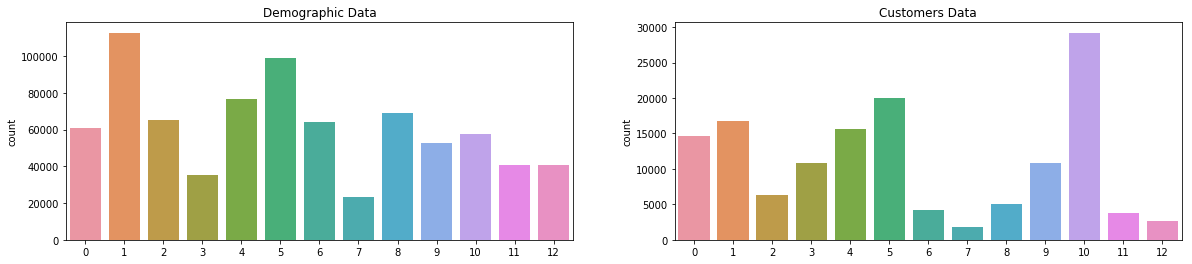

In [152]:
plots_comparision(clusters)

In [153]:
positive_factors=["PLZ8_ANTG4","CAMEO_INTL_2015_WEALTH","HH_EINKOMMEN_SCORE","PLZ8_ANTG3","LP_STATUS_GROB_1.0","SEMIO_LUST","SEMIO_ERL","ZABEOTYP_3.0","FINANZ_VORSORGER","ALTERSKATEGORIE_GROB"]
negative_factors=["MOBI_REGIO","FINANZ_MINIMALIST","PLZ8_ANTG1","KBA05_GBZ","KBA05_ANTG1","FINANZ_SPARER","PRAEGENDE_JUGENDJAHRE_DECADES","SEMIO_REL","FINANZ_UNAUFFAELLIGER","SEMIO_TRADV"]

In [154]:
# What kinds of people are part of a cluster that is overrepresented in the
# customer data compared to the general population?
centroid_4 = scaler.inverse_transform(pca.inverse_transform(kmeans.cluster_centers_[4]))

In [155]:
overrepresented_c = pd.Series(data = centroid_4, index = customers_clean.columns)

In [156]:
overrepresented_c

ALTERSKATEGORIE_GROB                3.962762
ANREDE_KZ                           1.383511
FINANZ_MINIMALIST                   4.386346
FINANZ_SPARER                       0.804424
FINANZ_VORSORGER                    5.162106
FINANZ_ANLEGER                      0.945219
FINANZ_UNAUFFAELLIGER               1.242957
FINANZ_HAUSBAUER                    3.555768
GREEN_AVANTGARDE                    0.569244
HEALTH_TYP                          1.824426
LP_LEBENSPHASE_FEIN                22.241939
LP_LEBENSPHASE_GROB                 6.102418
RETOURTYP_BK_S                      4.527188
SEMIO_SOZ                           4.043552
SEMIO_FAM                           3.287530
SEMIO_REL                           2.277947
SEMIO_MAT                           2.918471
SEMIO_VERT                          5.157606
SEMIO_LUST                          6.293731
SEMIO_ERL                           5.722887
SEMIO_KULT                          3.014239
SEMIO_RAT                           2.194835
SEMIO_KRIT

In [157]:
# What kinds of people are part of a cluster that is underrepresented in the
# customer data compared to the general population?
centroid_7 = scaler.inverse_transform(pca.inverse_transform(kmeans.cluster_centers_[7]))

In [158]:
underrepresented_c = pd.Series(data = centroid_7, index = customers_clean.columns)

In [159]:
underrepresented_c

ALTERSKATEGORIE_GROB                3.328100
ANREDE_KZ                           1.227731
FINANZ_MINIMALIST                   3.571250
FINANZ_SPARER                       1.875234
FINANZ_VORSORGER                    4.245458
FINANZ_ANLEGER                      1.669784
FINANZ_UNAUFFAELLIGER               1.978613
FINANZ_HAUSBAUER                    3.437454
GREEN_AVANTGARDE                    0.289808
HEALTH_TYP                          2.243741
LP_LEBENSPHASE_FEIN                17.556856
LP_LEBENSPHASE_GROB                 5.346390
RETOURTYP_BK_S                      4.057802
SEMIO_SOZ                           4.734485
SEMIO_FAM                           4.701133
SEMIO_REL                           3.741133
SEMIO_MAT                           3.845730
SEMIO_VERT                          5.153530
SEMIO_LUST                          5.451244
SEMIO_ERL                           4.116200
SEMIO_KULT                          4.508900
SEMIO_RAT                           2.843461
SEMIO_KRIT

In [160]:
centroid_df=pd.DataFrame({"feature":customers_clean.columns,"centroid_4":centroid_4,"centroid_7":centroid_7})


In [161]:
centroid_df.head(50)

,feature,centroid_4,centroid_7
0,ALTERSKATEGORIE_GROB,3.962762,3.328100
1,ANREDE_KZ,1.383511,1.227731
2,FINANZ_MINIMALIST,4.386346,3.571250
3,FINANZ_SPARER,0.804424,1.875234
4,FINANZ_VORSORGER,5.162106,4.245458
5,FINANZ_ANLEGER,0.945219,1.669784
6,FINANZ_UNAUFFAELLIGER,1.242957,1.978613
7,FINANZ_HAUSBAUER,3.555768,3.437454
8,GREEN_AVANTGARDE,0.569244,0.289808
9,HEALTH_TYP,1.824426,2.243741


In [162]:
centroid_df[centroid_df["feature"].isin(negative_factors)]

,feature,centroid_4,centroid_7
2,FINANZ_MINIMALIST,4.386346,3.571250
3,FINANZ_SPARER,0.804424,1.875234
6,FINANZ_UNAUFFAELLIGER,1.242957,1.978613
15,SEMIO_REL,2.277947,3.741133
26,SEMIO_TRADV,2.118939,3.015016
39,KBA05_ANTG1,1.827519,1.077321
43,KBA05_GBZ,3.367213,2.605412
49,MOBI_REGIO,3.383260,2.416919
53,PLZ8_ANTG1,2.395483,1.612835
192,PRAEGENDE_JUGENDJAHRE_DECADES,2.772035,2.584008


### Discussion 3.3: Compare Customer Data to Demographics Data

From the anaylsis above, it can be seen that

Cluster 4 is overrepresented in the customers data compared to general population data. Some characteristics of the group of population that are relative popular

Life stage of families were more LP_LEBENSPHASE_FEIN - 47.107875
Finanical Topology - FINANZ_MINIMALIST=5.3

Cluster 7 is underrepresented in the customers data. Some characteristics of the segment of the population that are relatively unpopular with the company:

PLZ8_ANTG1 - PLZ8 family houses (1.863436)
KBA05_ANTG1- Family houses in microcell (1.288347)

> Congratulations on making it this far in the project! Before you finish, make sure to check through the entire notebook from top to bottom to make sure that your analysis follows a logical flow and all of your findings are documented in **Discussion** cells. Once you've checked over all of your work, you should export the notebook as an HTML document to submit for evaluation. You can do this from the menu, navigating to **File -> Download as -> HTML (.html)**. You will submit both that document and this notebook for your project submission.

In [164]:
!jupyter nbconvert --to html Identify_Customer_Segments_Updated.ipynb

[NbConvertApp] Converting notebook Identify_Customer_Segments_Updated.ipynb to html
[NbConvertApp] Writing 1106513 bytes to Identify_Customer_Segments_Updated.html
